In [1]:
key ="2201050767bb417f928e06c7166304c6b41e485d"
b_key ="641DEDB0-361B-441D-BF2E-215378D97EB4"
from census import Census
from us import states
%matplotlib inline
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
import numpy as np
import requests
import pandas as pd
pd.options.mode.chained_assignment = None 
import os
import requests
import urllib.request, json 
import pybea
from scipy.stats import norm
from matplotlib.ticker import PercentFormatter
matplotlib.style.use('ggplot')


def get_perc(times,total,df):
    portions = []
    for i in times:
        portions.append(100 * df[i].sum()/df[total].sum())
    return portions


c = Census(key)

In [2]:
rural = pd.read_excel("final_rural.xlsx")
mrural = pd.read_excel("final_mrural.xlsx")
urban = pd.read_excel("final_urban.xlsx")
urban.head()

,geo_id,Median Age,Median Age ME,Population,White,Black,Native American,Asian,Native Hawaiian,Other,...,under_18,LAUS Code,S_Code,Code,County Name/State Abbreviation,Period,Force,Employed,Unemployed,unemployment_rate
12,1001,37.8,0.5,55049,41663,10113,226,444,6,123,...,13853,CN0100100000000,1,1,"Autauga County, AL",Jun-18,26504,25309,1195,4.5
26,1003,42.3,0.3,199510,165950,18406,1228,1325,0,305,...,44270,CN0100300000000,1,3,"Baldwin County, AL",Jun-18,98459,94288,4171,4.2
40,1015,39.1,0.4,115883,84592,23561,229,1079,6,27,...,25641,CN0101500000000,1,15,"Calhoun County, AL",Jun-18,47029,44279,2750,5.8
54,1017,43.1,0.3,34018,19303,13770,78,312,0,17,...,7283,CN0101700000000,1,17,"Chambers County, AL",Jun-18,15396,14646,750,4.9
68,1031,39.3,0.4,50991,36393,8671,421,623,0,5,...,12122,CN0103100000000,1,31,"Coffee County, AL",Jun-18,20814,19754,1060,5.1


In [3]:
rural['Population'].sum()

5303194

C:\Users\Gabriel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Age Distribution')

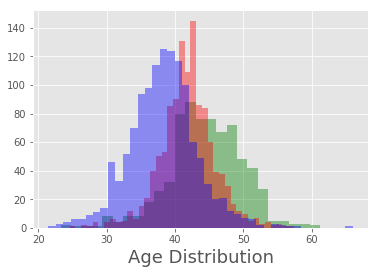

In [4]:
fig, ax = plt.subplots()

sns.distplot(rural["Median Age"],hist=True, ax=ax, color='g',kde= False,  label="Rural");
sns.distplot(mrural["Median Age"],hist=True, ax=ax, color='r',kde= False,  label="Mostly rural");
sns.distplot(urban["Median Age"],hist=True,  ax=ax, color='b', kde= False, label="Urban");
plt.xlabel('Age Distribution', fontsize=18)

Text(0.5, 0, 'Foreign Born Percentage')

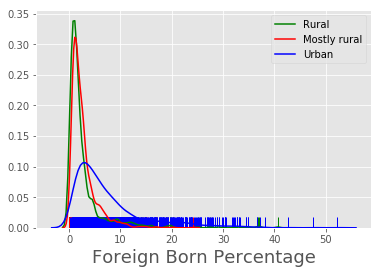

In [5]:
rural["fbp"] = 100 * rural["Foreign Born"]/rural["Population"]
mrural["fbp"] = 100 *mrural["Foreign Born"]/mrural["Population"]
urban["fbp"] = 100 * urban["Foreign Born"]/urban["Population"]
fig, ax = plt.subplots()

sns.distplot(rural["fbp"],hist=False, rug=True, ax=ax, color='g', label="Rural");
sns.distplot(mrural["fbp"],hist=False, rug=True, ax=ax, color='r', label="Mostly rural");
sns.distplot(urban["fbp"],hist=False, rug=True, ax=ax, color='b', label="Urban");
plt.xlabel('Foreign Born Percentage', fontsize=18)

In [6]:
r_mean= rural["agg_travel_time"]/rural["work_time"]
m_mean = mrural["agg_travel_time"]/mrural["work_time"]
u_mean = urban["agg_travel_time"]/urban["work_time"]
df = pd.DataFrame(u_mean)
m_mean.isnull().sum()


33

In [7]:
r_mean = r_mean.dropna()
m_mean = m_mean.dropna()
u_mean = u_mean.dropna()

Text(0.5,0,'Mean Work Time')

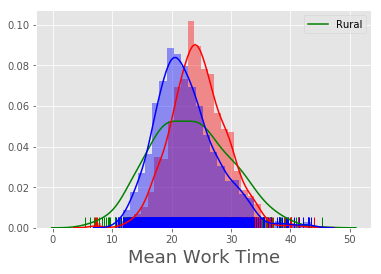

In [8]:

fig, ax = plt.subplots()
sns.distplot(r_mean,hist=False, rug=True, ax=ax, color='g', label="Rural");

sns.distplot(m_mean,hist=True, rug=True, ax=ax, color='r', label="Mostly rural");
sns.distplot(u_mean,hist=True, rug=True, ax=ax, color='b', label="Urban");
plt.xlabel('Mean Work Time', fontsize=18)

In [9]:
rural.columns

Index(['geo_id', 'Median Age', 'Median Age ME', 'Population', 'White', 'Black',
       'Native American', 'Asian', 'Native Hawaiian', 'Other', 'Multiple',
       'Hispanic', 'Foreign Born', 'Foreign Born ME', 'Child Poverty Ratio',
       'total_ed', 'below_hs', 'hs_grad', 'some_college', 'bachelor_deg',
       'graduate_deg', 'Poor', 'agg_travel_time', 'work_time', 'under5',
       'five', 'ten', 'fifteen', 'twenty', 'twenty5', 'thirty', 'thirty5',
       'fourty', 'fourty5', 'sixty', 'ninety', 'h_above_poverty',
       'Median Household Income', 'acs_laborf', 'acs_unemployed', 'Name',
       'County', 'State', 'under_18', 'LAUS Code', 'S_Code', 'Code',
       'County Name/State Abbreviation', 'Period', 'Force', 'Employed',
       'Unemployed', 'unemployment_rate', 'fbp'],
      dtype='object')

Text(0.5,0,'Hispanic')

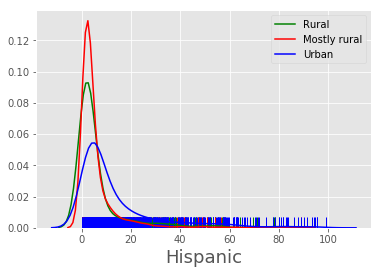

In [10]:
r_his = 100 * rural["Hispanic"]/ rural["Population"]
m_his = 100 *mrural["Hispanic"]/ mrural["Population"]
u_his = 100 * urban["Hispanic"]/ urban["Population"]
fig, ax = plt.subplots()

sns.distplot(r_his,hist=False, rug=True, ax=ax, color='g', label="Rural");
sns.distplot(m_his,hist=False, rug=True, ax=ax, color='r', label="Mostly rural");
sns.distplot(u_his,hist=False, rug=True, ax=ax, color='b', label="Urban");
plt.xlabel('Hispanic', fontsize=18)


NameError: name 'r_as' is not defined

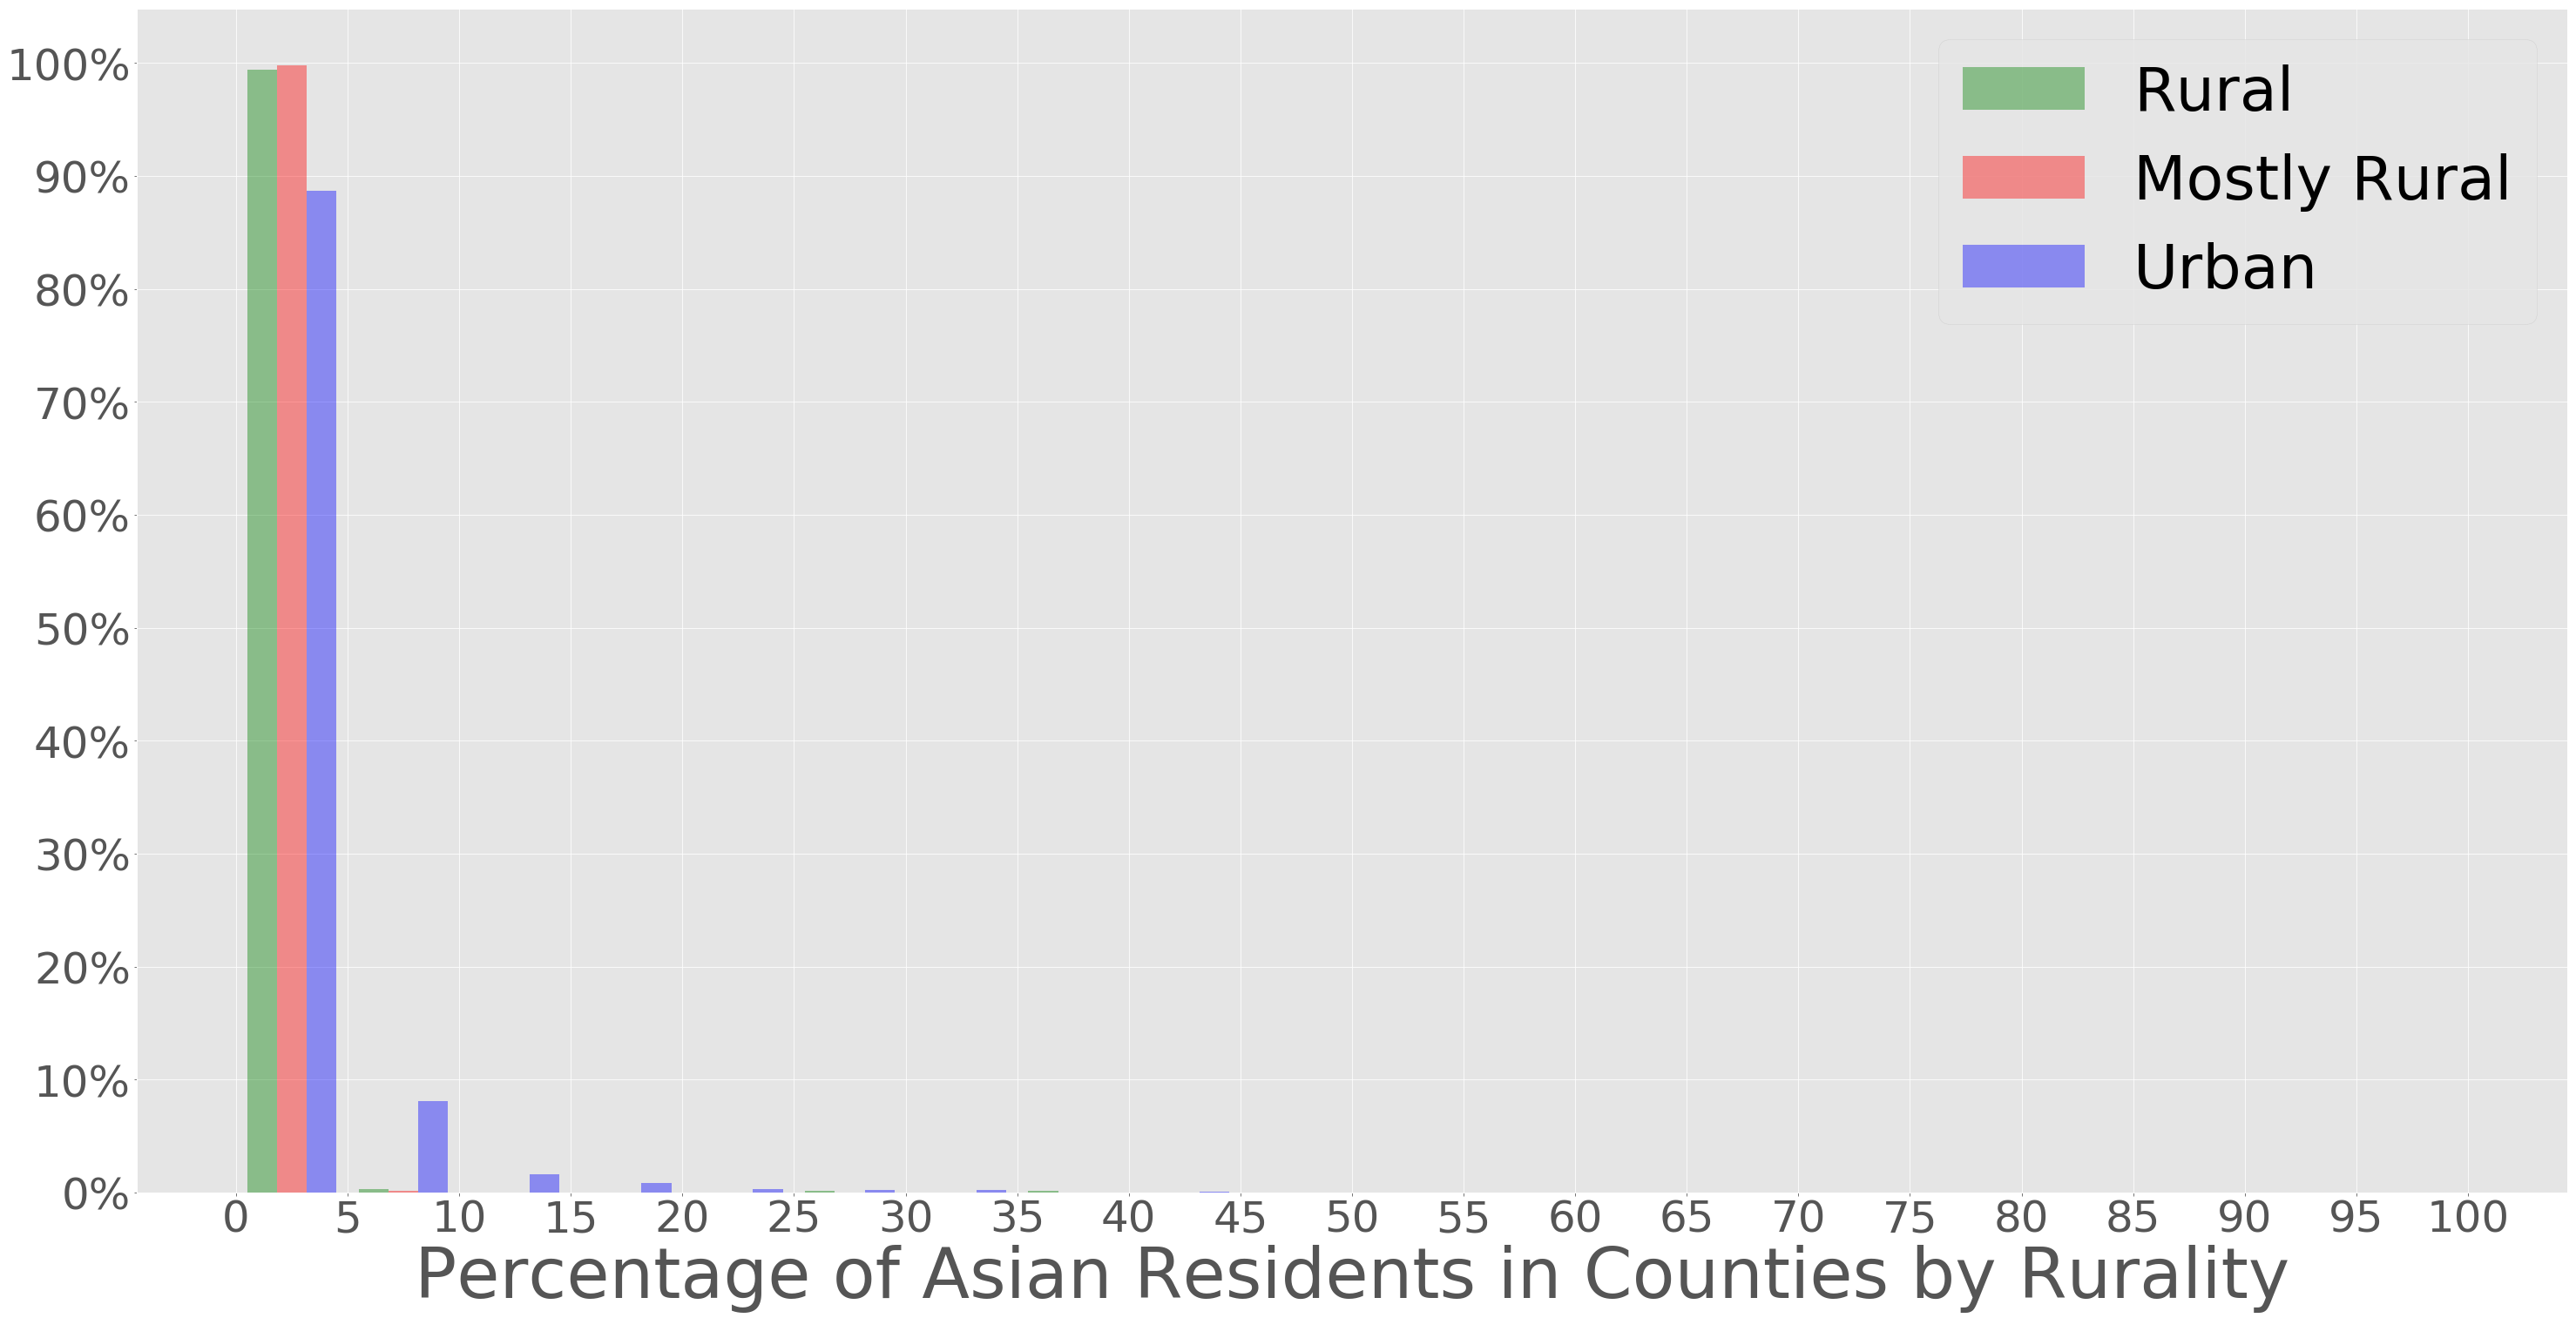

In [7]:
x = 'Asian'
r_as = 100 * rural[x]/ rural["Population"]
m_as = 100 *mrural[x]/ mrural["Population"]
u_as = 100 * urban[x]/ urban["Population"]
fig, ax = plt.subplots(figsize=(50, 25) ,sharex = True )

mbin = [i *5 for i in range(0,21)]

plt.xticks( mbin,fontsize=30)
ax.yaxis.set_major_formatter(PercentFormatter())


plt.xticks(fontsize = 50)
plt.yticks( [i * 10 for i in range(11)],fontsize=30)

plt.yticks(fontsize = 50)
 # labels along the bottom edge are off
#sns.set(font_scale=3)
sns.distplot([r_as,m_as,u_as],hist=True,  kde= False, bins =mbin, ax=ax, color=['green',"red",'blue',] , label=['Rural','Mostly Rural',"Urban"], hist_kws={ "weights":[100 * np.ones_like(r_as)/float(len(r_as)),100 * np.ones_like(m_as)/float(len(m_as)),100 * np.ones_like(u_as)/float(len(u_as))]})
#sns.distplot(r_as,hist=True,  kde= False, bins =mbin, ax=ax, color='green', label="Rural",hist_kws={ "weights":100 * np.ones_like(r_as)/float(len(r_as)),"stacked":False})
#sns.distplot(m_as,hist=True, ax=ax,kde= False, color='r', bins= mbin,label="Mostly rural",hist_kws={"weights":100 * np.ones_like(m_as)/float(len(m_as)),"stacked":False})
#sns.distplot(u_as,hist=True,  ax=ax, kde= False, color='b', bins= mbin, label="Urban",hist_kws={"weights":100 * np.ones_like(u_as)/float(len(u_as)),"stacked":False})
ax.legend(loc=1, prop={'size': 70})


plt.xlabel('Percentage of ' +x+ ' Residents in Counties by Rurality', fontsize=80)
plt.show()

In [9]:
rural.ix[rural['Black'].idxmax()]

KeyError: 'Asian'

No handles with labels found to put in legend.
c:\users\gabriel\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


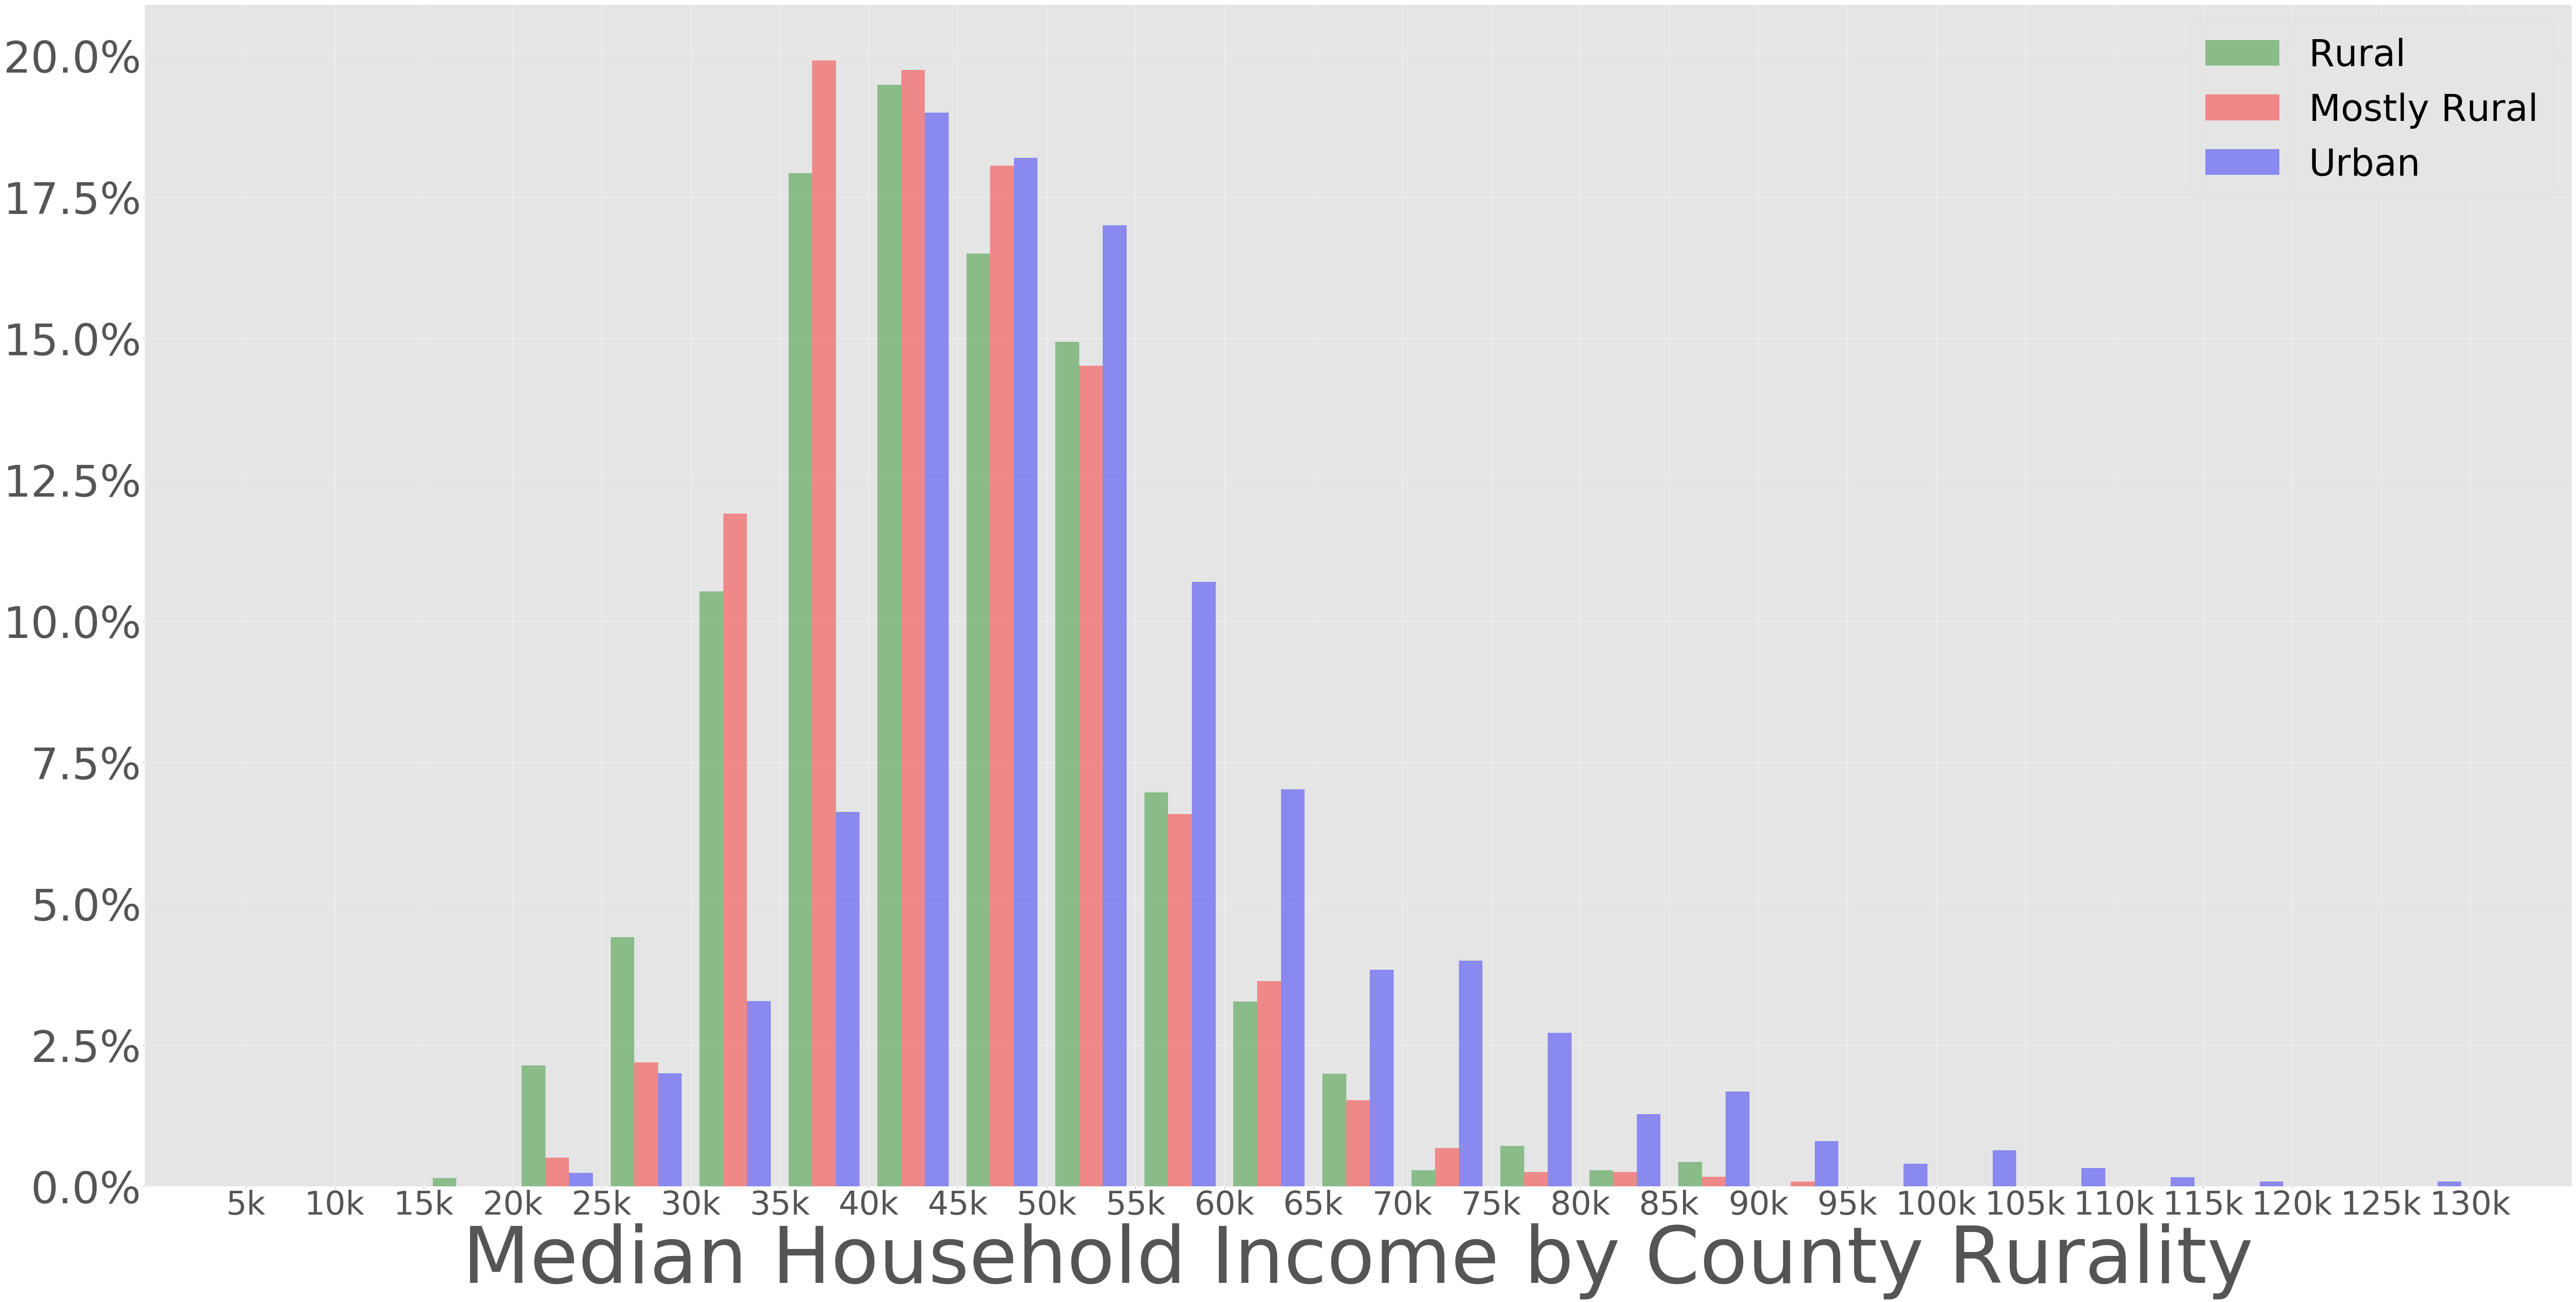

In [13]:
r_as = rural["Median Household Income"]
m_as = mrural["Median Household Income"]
u_as = urban["Median Household Income"]
mlabels = [str(i *5)+"k" for i in range(1,27)]

fig, ax = plt.subplots(figsize=(100, 50) ,sharex = True )
ax.legend(loc=1, prop={'size': 70})

ax.yaxis.set_major_formatter(PercentFormatter())



mbins = [i * 5000 for i in range(1,27)]
plt.xticks( mbins,fontsize=35)
plt.xticks(fontsize =75)
plt.yticks(fontsize = 100)
plt.xlabel('Median Household Income by County Rurality', fontsize=180)
ax.set_xticklabels(mlabels)



sns.distplot([r_as,m_as,u_as],hist=True, kde= False, bins =mbins, ax=ax, color=['green',"red",'blue',] , label=['Rural','Mostly Rural',"Urban"], hist_kws={"weights":[100 * np.ones_like(r_as)/float(len(r_as)),100 * np.ones_like(m_as)/float(len(m_as)),100 * np.ones_like(u_as)/float(len(u_as))]})
 # labels along the bottom edge are off
#sns.set(font_scale=3)
#sns.distplot(r_as,hist=True,  kde= False, bins =mbin, ax=ax, color='green', label="Rural",hist_kws={ "weights":100 * np.ones_like(r_as)/float(len(r_as)),"stacked":False})
#sns.distplot(m_as,hist=True, ax=ax,kde= False, color='r', bins= mbin,label="Mostly rural",hist_kws={"weights":100 * np.ones_like(m_as)/float(len(m_as)),"stacked":False})
#sns.distplot(u_as,hist=True,  ax=ax, kde= False, color='b', bins= mbin, label="Urban",hist_kws={"weights":100 * np.ones_like(u_as)/float(len(u_as)),"stacked":False})
ax.legend(loc=1, prop={'size': 85})



plt.show()

In [14]:
rural.columns

Index(['geo_id', 'Median Age', 'Median Age ME', 'Population', 'White', 'Black',
       'Native American', 'Asian', 'Native Hawaiian', 'Other', 'Multiple',
       'Hispanic', 'Foreign Born', 'Foreign Born ME', 'Child Poverty Ratio',
       'total_ed', 'below_hs', 'hs_grad', 'some_college', 'bachelor_deg',
       'graduate_deg', 'Poor', 'agg_travel_time', 'work_time', 'under5',
       'five', 'ten', 'fifteen', 'twenty', 'twenty5', 'thirty', 'thirty5',
       'fourty', 'fourty5', 'sixty', 'ninety', 'h_above_poverty',
       'Median Household Income', 'acs_laborf', 'acs_unemployed', 'Name',
       'County', 'State', 'under_18', 'LAUS Code', 'S_Code', 'Code',
       'County Name/State Abbreviation', 'Period', 'Force', 'Employed',
       'Unemployed', 'unemployment_rate', 'fbp'],
      dtype='object')

In [15]:
urban['work_time'].sum()

122506553

In [16]:
times = ['under5','five', 'ten', 'fifteen', 'twenty', 'twenty5', 'thirty', 'thirty5', 'fourty', 'fourty5', 'sixty', 'ninety']
times

['under5',
 'five',
 'ten',
 'fifteen',
 'twenty',
 'twenty5',
 'thirty',
 'thirty5',
 'fourty',
 'fourty5',
 'sixty',
 'ninety']

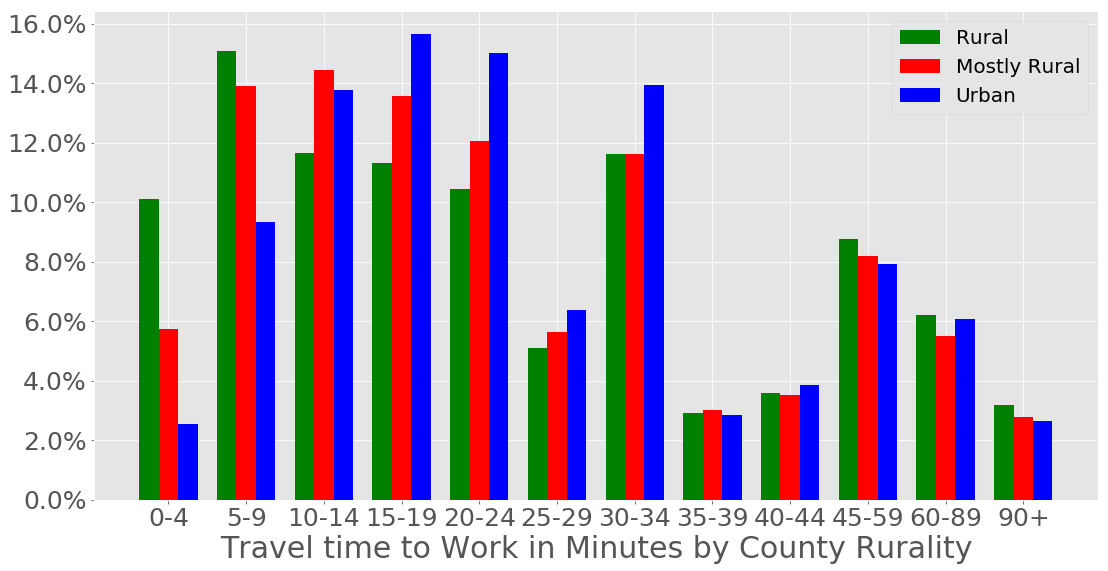

In [17]:

ind = np.arange(12)
times = ['under5','five', 'ten', 'fifteen', 'twenty', 'twenty5', 'thirty', 'thirty5', 'fourty', 'fourty5', 'sixty', 'ninety']

rural_t = get_perc(times,"work_time",rural) 
mrural_t = get_perc(times,"work_time",mrural) 
urban_t = get_perc(times,"work_time",urban) 
data = [rural_t,mrural_t,urban_t]

times = ['0-4','5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-59', '60-89', '90+']
f, ax = plt.subplots(figsize=(18,9))

X = np.arange(12)
plt.bar(X + 0.00, data[0], color = 'g', width = 0.25,label="Rural")
plt.bar(X + 0.25, data[1], color = 'r', width = 0.25, tick_label = times,align = "center",label="Mostly Rural")
plt.bar(X + 0.50, data[2], color = 'b', width = 0.25,label="Urban" )
plt.xticks(fontsize =25)
plt.yticks(fontsize =25)
ax.yaxis.set_major_formatter(PercentFormatter())
plt.xlabel('Travel time to Work in Minutes by County Rurality', fontsize=30)
ax.legend(loc=1, prop={'size': 20})


plt.show()



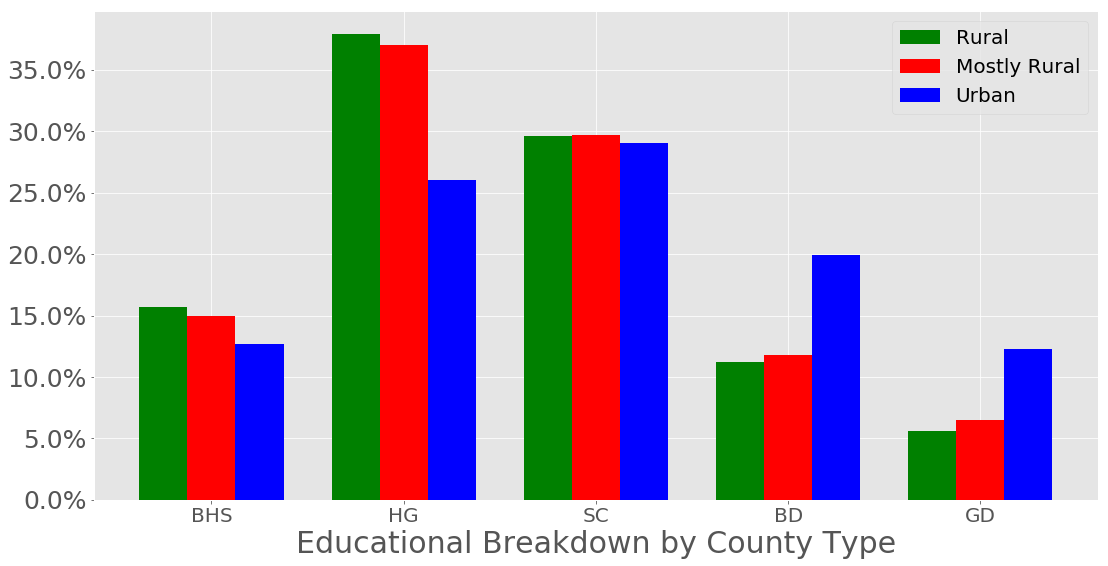

In [18]:

X = np.arange(5)
ed = ['below_hs', 'hs_grad', 'some_college', 'bachelor_deg',
       'graduate_deg']
rural_t = get_perc(ed,"total_ed",rural) 
mrural_t = get_perc(ed,"total_ed",mrural) 
urban_t = get_perc(ed,"total_ed",urban) 
data = [rural_t,mrural_t,urban_t]

times = ['BHS','HG','SC','BD','GD']
f, ax = plt.subplots(figsize=(18,9))


plt.bar(X + 0.00, data[0], color = 'g', width = 0.25,label="Rural")
plt.bar(X + 0.25, data[1], color = 'r', width = 0.25, tick_label = times,align = "center",label="Mostly Rural")
plt.bar(X + 0.50, data[2], color = 'b', width = 0.25,label="Urban" )
plt.xticks(fontsize =20)
plt.yticks(fontsize =25)
ax.yaxis.set_major_formatter(PercentFormatter())
plt.xlabel('Educational Breakdown by County Type', fontsize=30)
ax.legend(loc=1, prop={'size': 20})


plt.show()



c:\users\gabriel\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


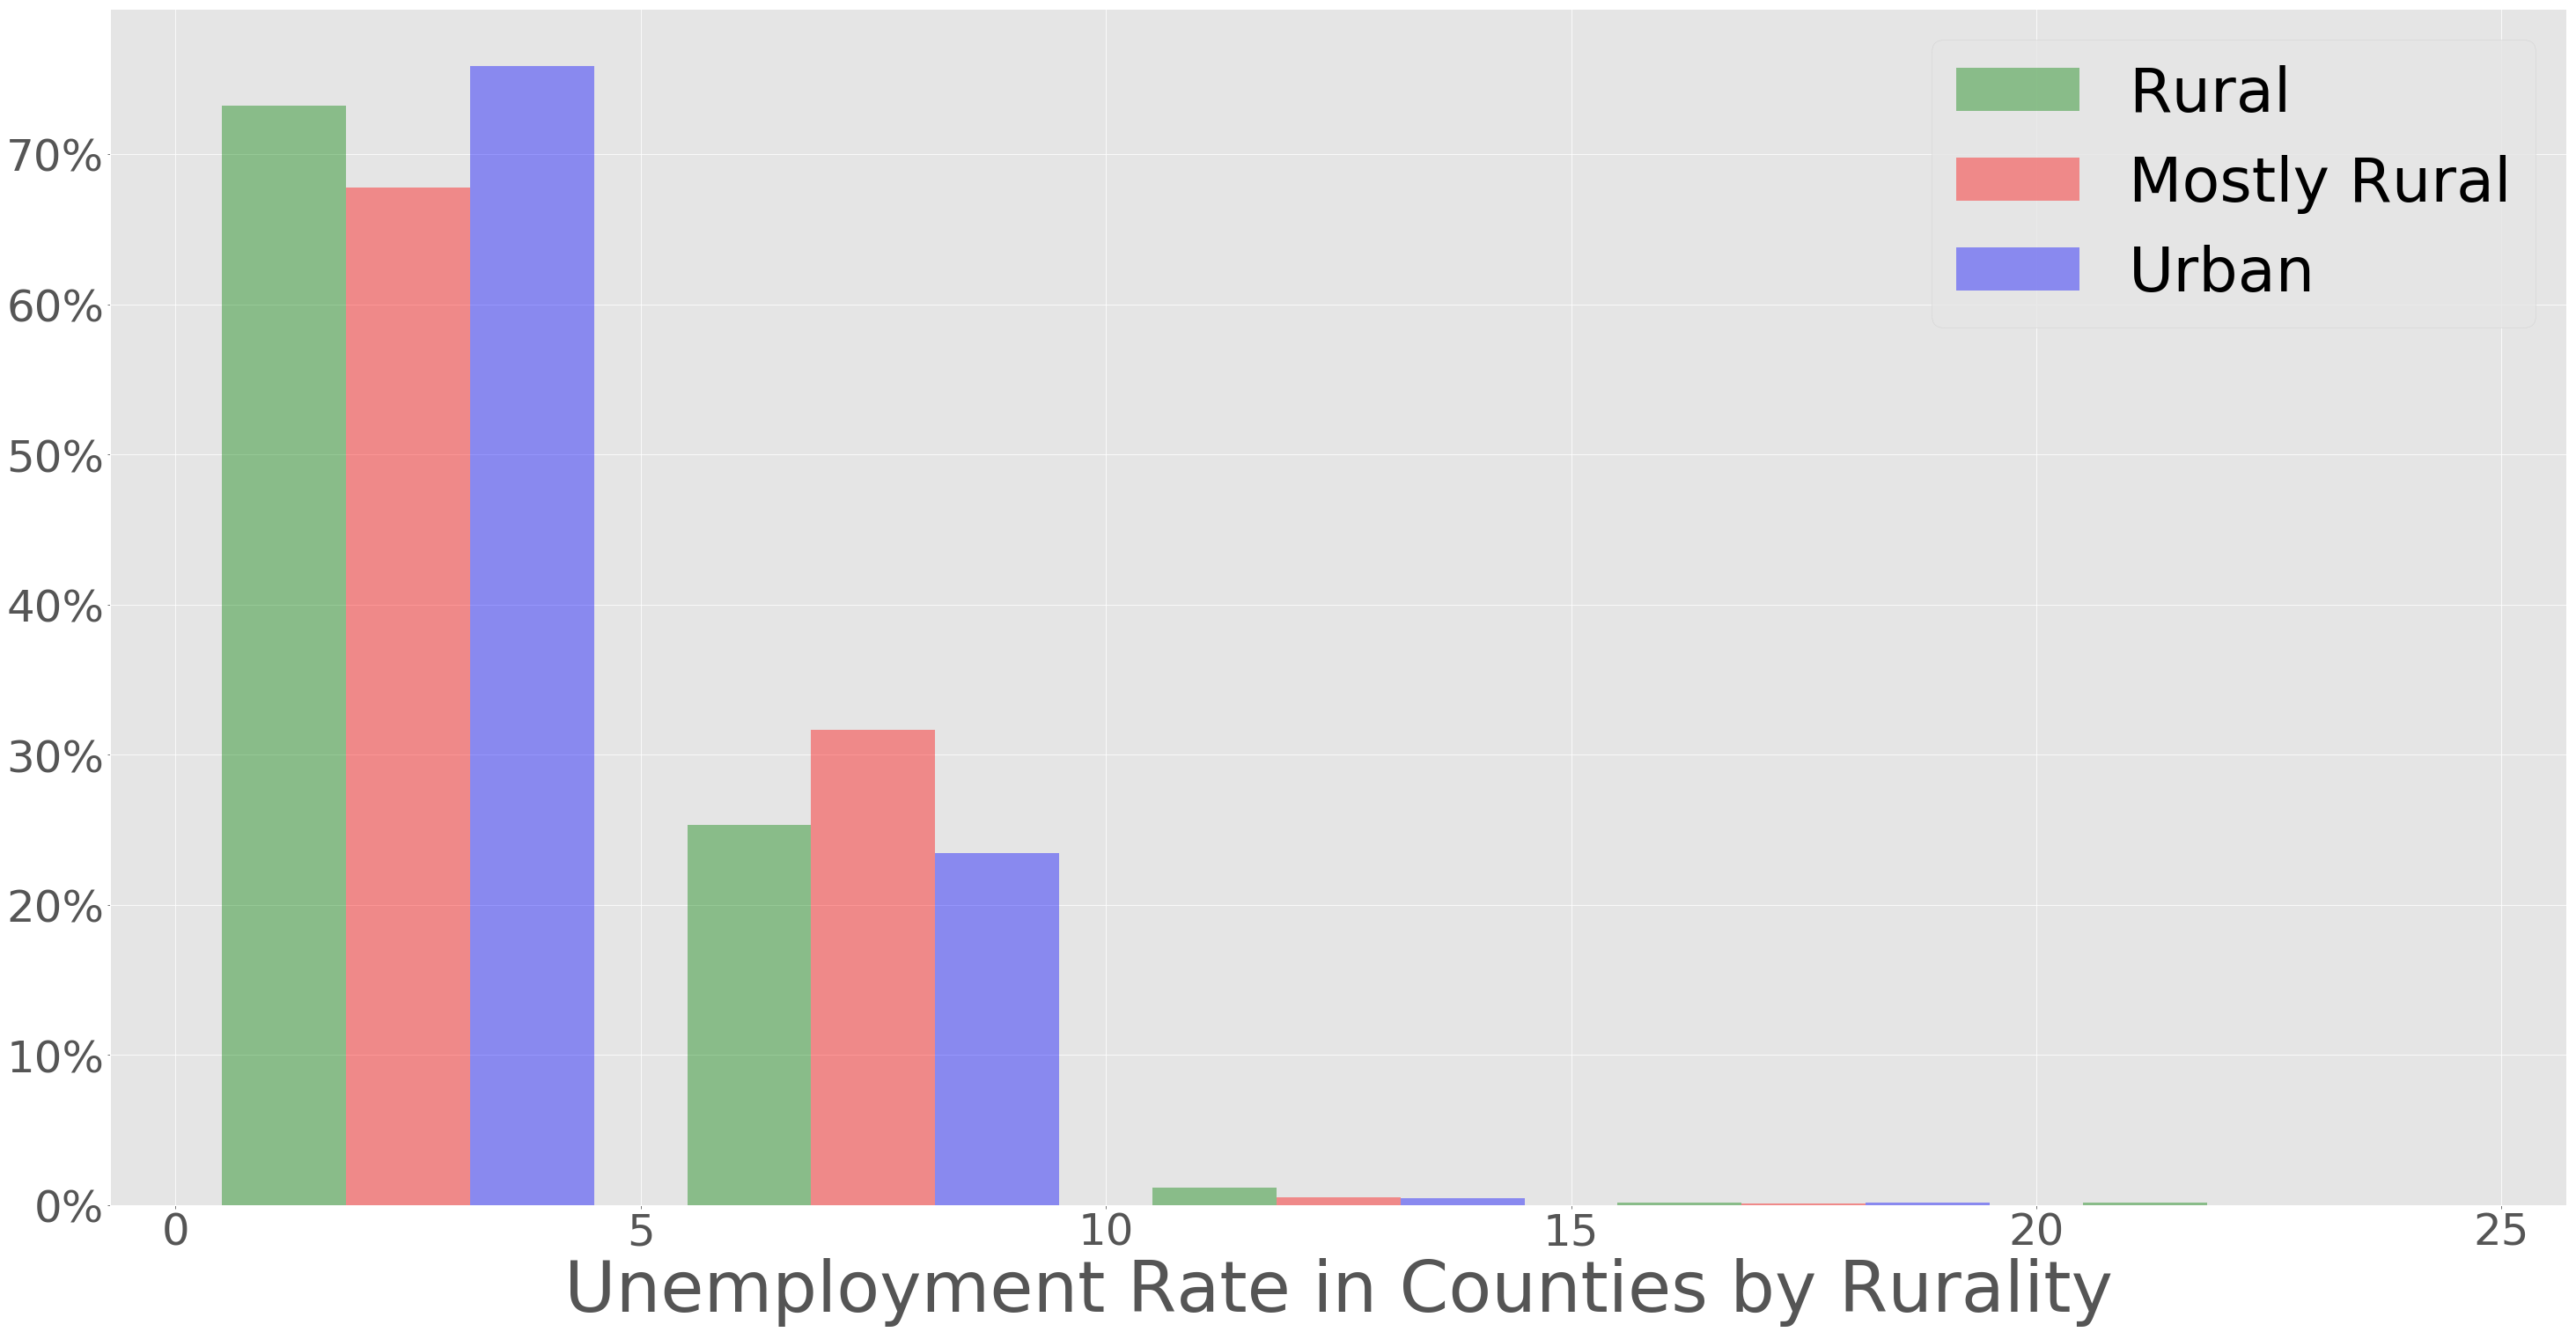

In [19]:
r_as = rural["unemployment_rate"] 
m_as = mrural["unemployment_rate"] 
u_as = urban["unemployment_rate"] 
fig, ax = plt.subplots(figsize=(50, 25) ,sharex = True )

mbin = [i*5 for i in range(0,6)]

plt.xticks( mbin,fontsize=30)
ax.yaxis.set_major_formatter(PercentFormatter())





plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
 # labels along the bottom edge are off
#sns.set(font_scale=3)
sns.distplot([r_as,m_as,u_as],hist=True,  kde= False, bins =mbin, ax=ax, color=['green',"red",'blue',] , label=['Rural','Mostly Rural',"Urban"], hist_kws={ "weights":[100 * np.ones_like(r_as)/float(len(r_as)),100 * np.ones_like(m_as)/float(len(m_as)),100 * np.ones_like(u_as)/float(len(u_as))]})
#sns.distplot(r_as,hist=True,  kde= False, bins =mbin, ax=ax, color='green', label="Rural",hist_kws={ "weights":100 * np.ones_like(r_as)/float(len(r_as)),"stacked":False})
#sns.distplot(m_as,hist=True, ax=ax,kde= False, color='r', bins= mbin,label="Mostly rural",hist_kws={"weights":100 * np.ones_like(m_as)/float(len(m_as)),"stacked":False})
#sns.distplot(u_as,hist=True,  ax=ax, kde= False, color='b', bins= mbin, label="Urban",hist_kws={"weights":100 * np.ones_like(u_as)/float(len(u_as)),"stacked":False})
ax.legend(loc=1, prop={'size': 70})

plt.xlabel('Unemployment Rate in Counties by Rurality', fontsize=80)
plt.show()

In [20]:
mrural["unemployment_rate"].max()

17.5

In [21]:
1 -urban["Unemployed"].sum()/urban['Force'].sum()

0.95854850177646334

In [22]:
1 -rural["Unemployed"].sum()/rural['Force'].sum()

0.95619795184012124

In [23]:
1 -mrural["Unemployed"].sum()/mrural['Force'].sum()

0.95632939325000998

c:\users\gabriel\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


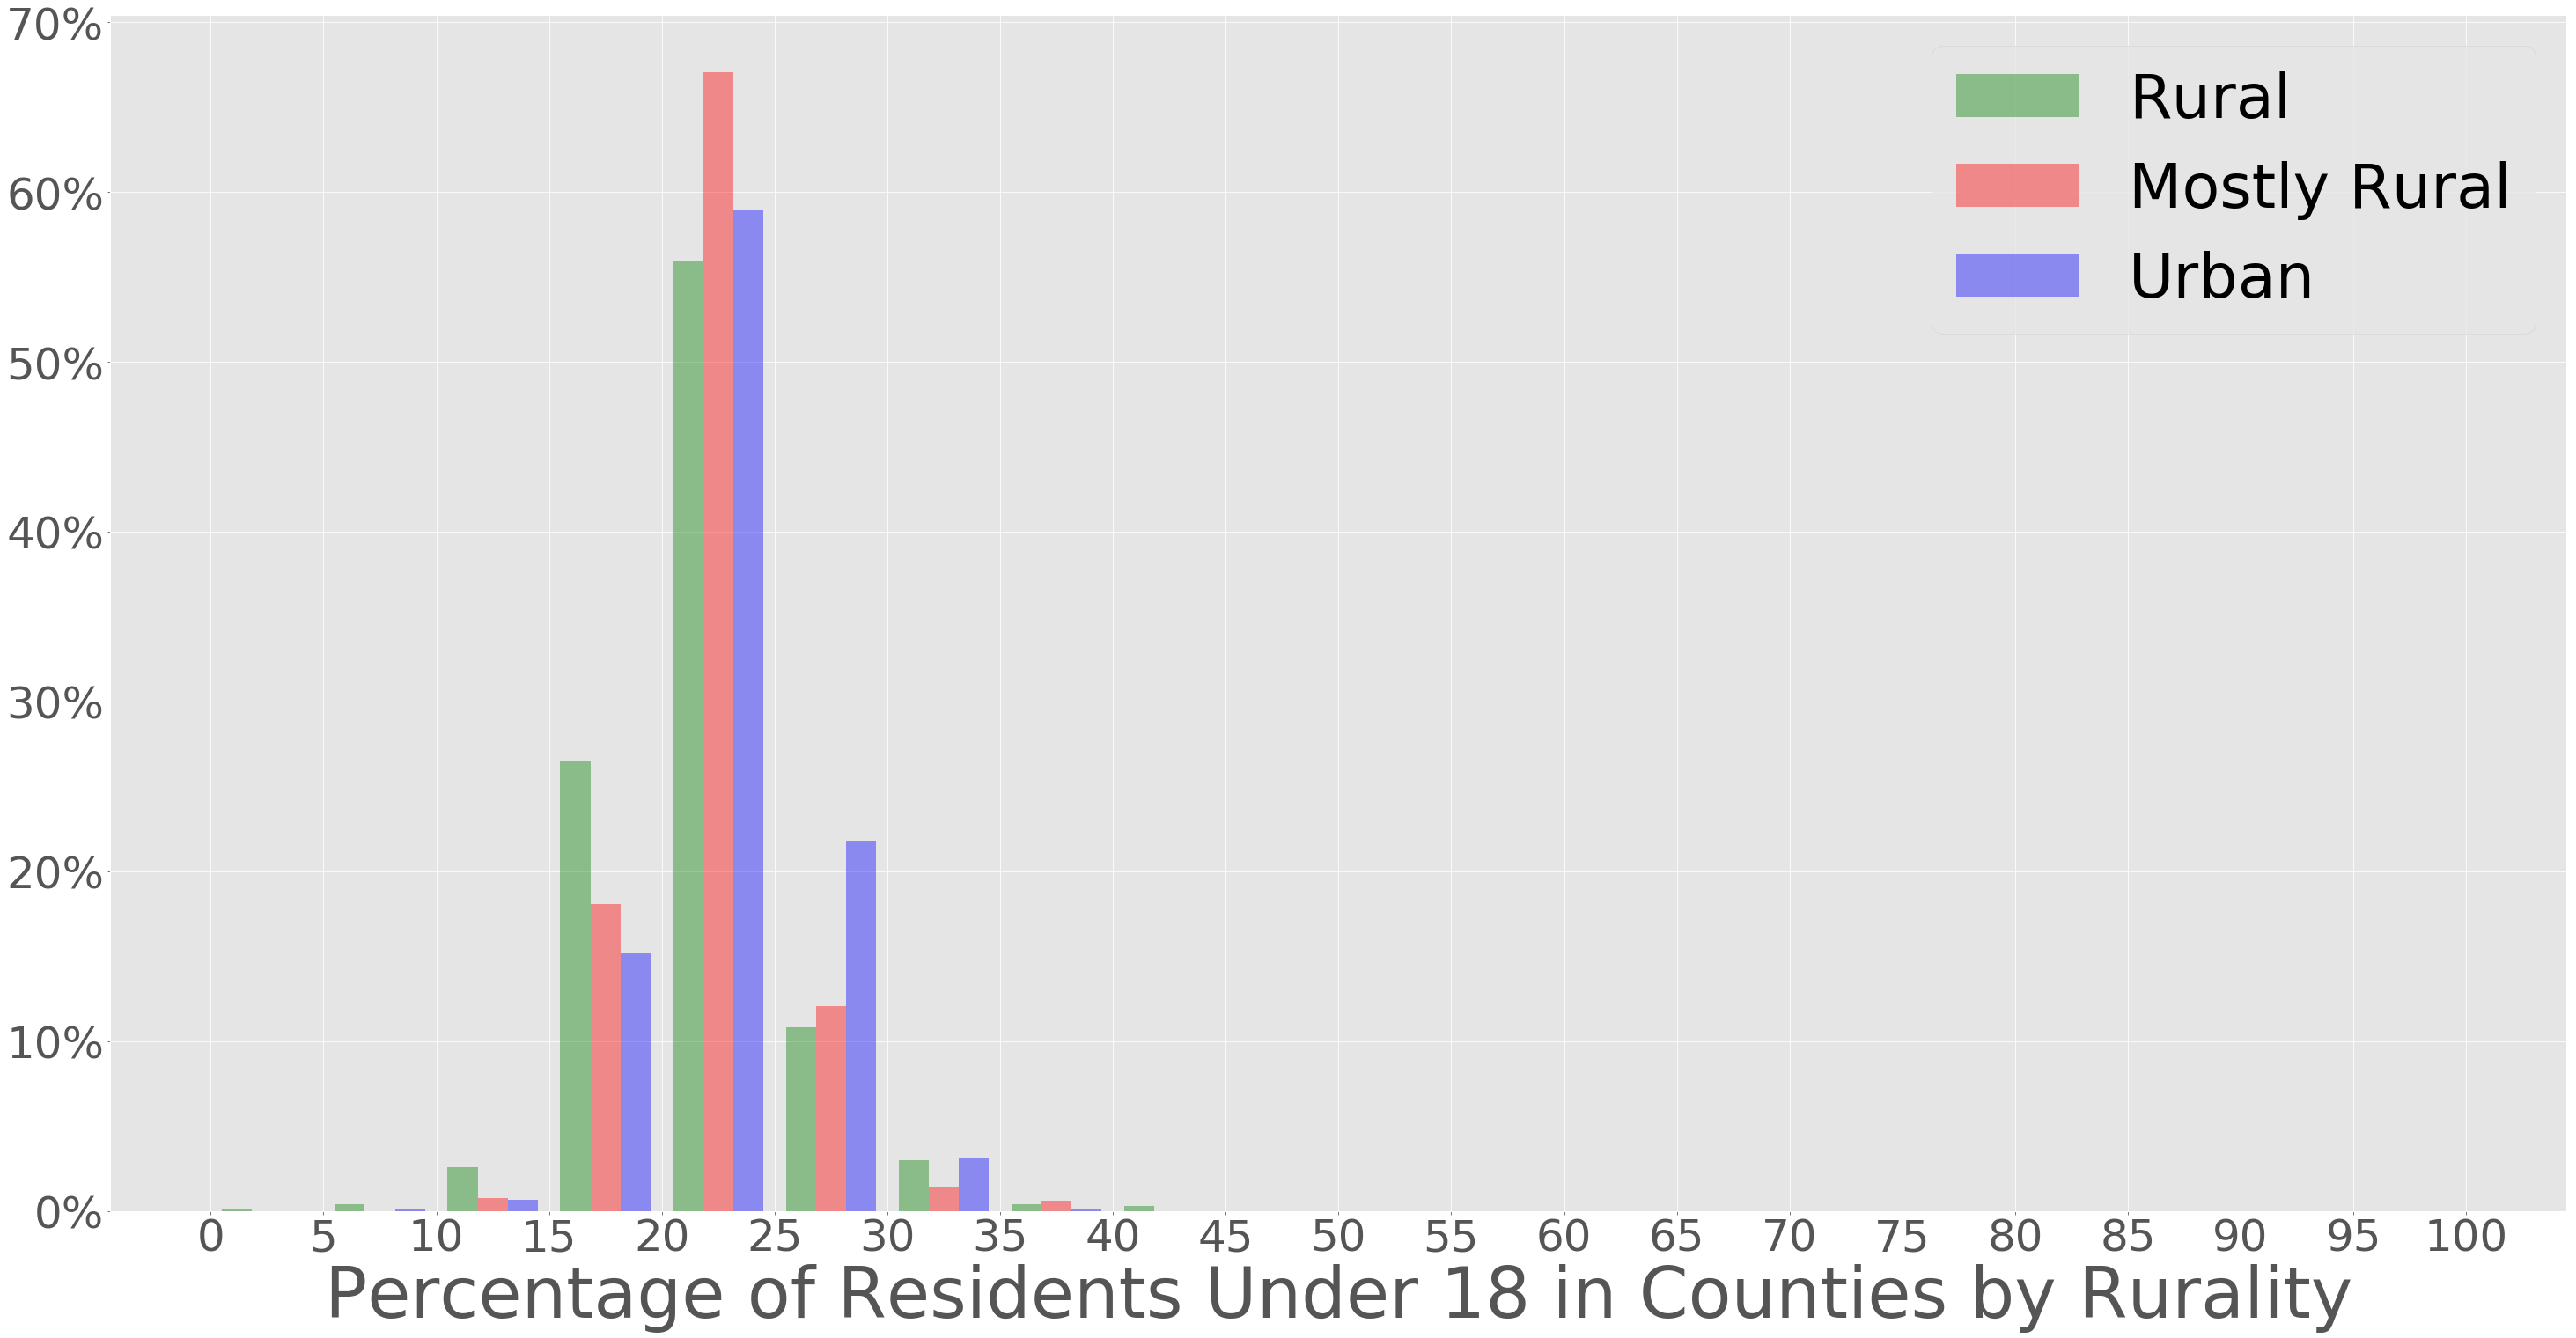

In [24]:
r_as = 100 * rural["under_18"]/ rural["Population"]
m_as = 100 *mrural["under_18"]/ mrural["Population"]
u_as = 100 * urban["under_18"]/ urban["Population"]
fig, ax = plt.subplots(figsize=(50, 25) ,sharex = True )

mbin = [i *5 for i in range(0,21)]

plt.xticks( mbin,fontsize=30)
ax.yaxis.set_major_formatter(PercentFormatter())


plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
 # labels along the bottom edge are off
#sns.set(font_scale=3)
sns.distplot([r_as,m_as,u_as],hist=True,  kde= False, bins =mbin, ax=ax, color=['green',"red",'blue',] , label=['Rural','Mostly Rural',"Urban"], hist_kws={ "weights":[100 * np.ones_like(r_as)/float(len(r_as)),100 * np.ones_like(m_as)/float(len(m_as)),100 * np.ones_like(u_as)/float(len(u_as))]})
#sns.distplot(r_as,hist=True,  kde= False, bins =mbin, ax=ax, color='green', label="Rural",hist_kws={ "weights":100 * np.ones_like(r_as)/float(len(r_as)),"stacked":False})
#sns.distplot(m_as,hist=True, ax=ax,kde= False, color='r', bins= mbin,label="Mostly rural",hist_kws={"weights":100 * np.ones_like(m_as)/float(len(m_as)),"stacked":False})
#sns.distplot(u_as,hist=True,  ax=ax, kde= False, color='b', bins= mbin, label="Urban",hist_kws={"weights":100 * np.ones_like(u_as)/float(len(u_as)),"stacked":False})
ax.legend(loc=1, prop={'size': 70})

plt.xlabel('Percentage of Residents Under 18 in Counties by Rurality', fontsize=80)
plt.show()

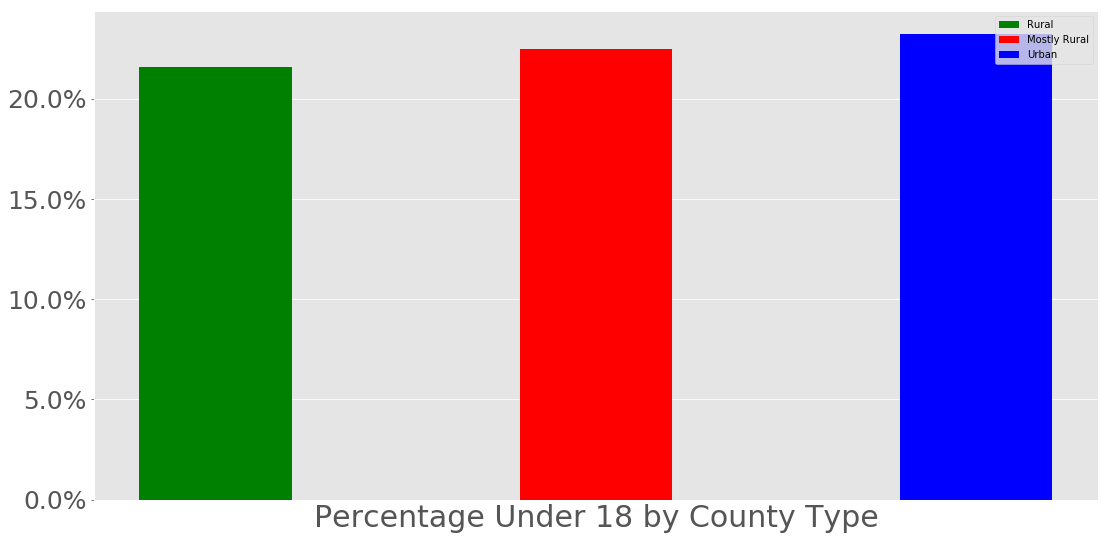

In [25]:

X = np.arange(1)
child = ['under_18']
rural_t = get_perc(child,"Population",rural) 
mrural_t = get_perc(child,"Population",mrural) 
urban_t = get_perc(child,"Population",urban) 
data = [rural_t,mrural_t,urban_t]


f, ax = plt.subplots(figsize=(18,9))


plt.bar(X + 0.00, data[0], color = 'g', width = 0.10,label="Rural")
plt.bar(X + 0.25, data[1], color = 'r', width = 0.10, align = "center",label="Mostly Rural")
plt.bar(X + 0.50, data[2], color = 'b', width = 0.10,label="Urban" )
plt.xticks(fontsize =20)
plt.yticks(fontsize =25)

ax.yaxis.set_major_formatter(PercentFormatter())
plt.xlabel('Percentage Under 18 by County Type', fontsize=30)
ax.legend(loc=1, prop={'size': 10})

ax.set_xticks([])
plt.show()

In [26]:
print(rural)

      geo_id  Median Age  Median Age ME  Population  White  Black  \
12      1023        45.1            0.1       13287   7468   5611   
26      1027        43.7            0.5       13483  10822   1988   
40      1029        41.5            0.7       14991  13911    354   
54      1037        44.9            0.3       10864   7064   3516   
68      1041        41.6            0.7       13896   9848   3290   
82      1063        41.3            1.3        8587   1472   6971   
96      1075        44.3            0.3       14066  12116   1584   
110     1085        40.4            1.3       10565   2578   7886   
124     1105        37.1            1.4        9856   2920   6760   
138     1107        42.2            0.5       20042  10994   8372   
152     1119        36.5            0.7       13285   3265   9520   
166     1129        41.4            1.1       16909  11001   4189   
180     1131        40.2            0.6       11119   3050   8000   
194     2013        42.8          

In [27]:
rural.head()

,geo_id,Median Age,Median Age ME,Population,White,Black,Native American,Asian,Native Hawaiian,Other,...,LAUS Code,S_Code,Code,County Name/State Abbreviation,Period,Force,Employed,Unemployed,unemployment_rate,fbp
12,1023,45.1,0.1,13287,7468,5611,2,6,0,2,...,CN0102300000000,1,23,"Choctaw County, AL",Jun-18,4643,4321,322,6.9,0.165575
26,1027,43.7,0.5,13483,10822,1988,119,0,0,25,...,CN0102700000000,1,27,"Clay County, AL",Jun-18,6016,5731,285,4.7,1.891270
40,1029,41.5,0.7,14991,13911,354,21,86,0,0,...,CN0102900000000,1,29,"Cleburne County, AL",Jun-18,5858,5543,315,5.4,1.747715
54,1037,44.9,0.3,10864,7064,3516,8,0,0,0,...,CN0103700000000,1,37,"Coosa County, AL",Jun-18,4460,4228,232,5.2,1.251841
68,1041,41.6,0.7,13896,9848,3290,123,232,0,55,...,CN0104100000000,1,41,"Crenshaw County, AL",Jun-18,6446,6135,311,4.8,2.288428


c:\users\gabriel\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


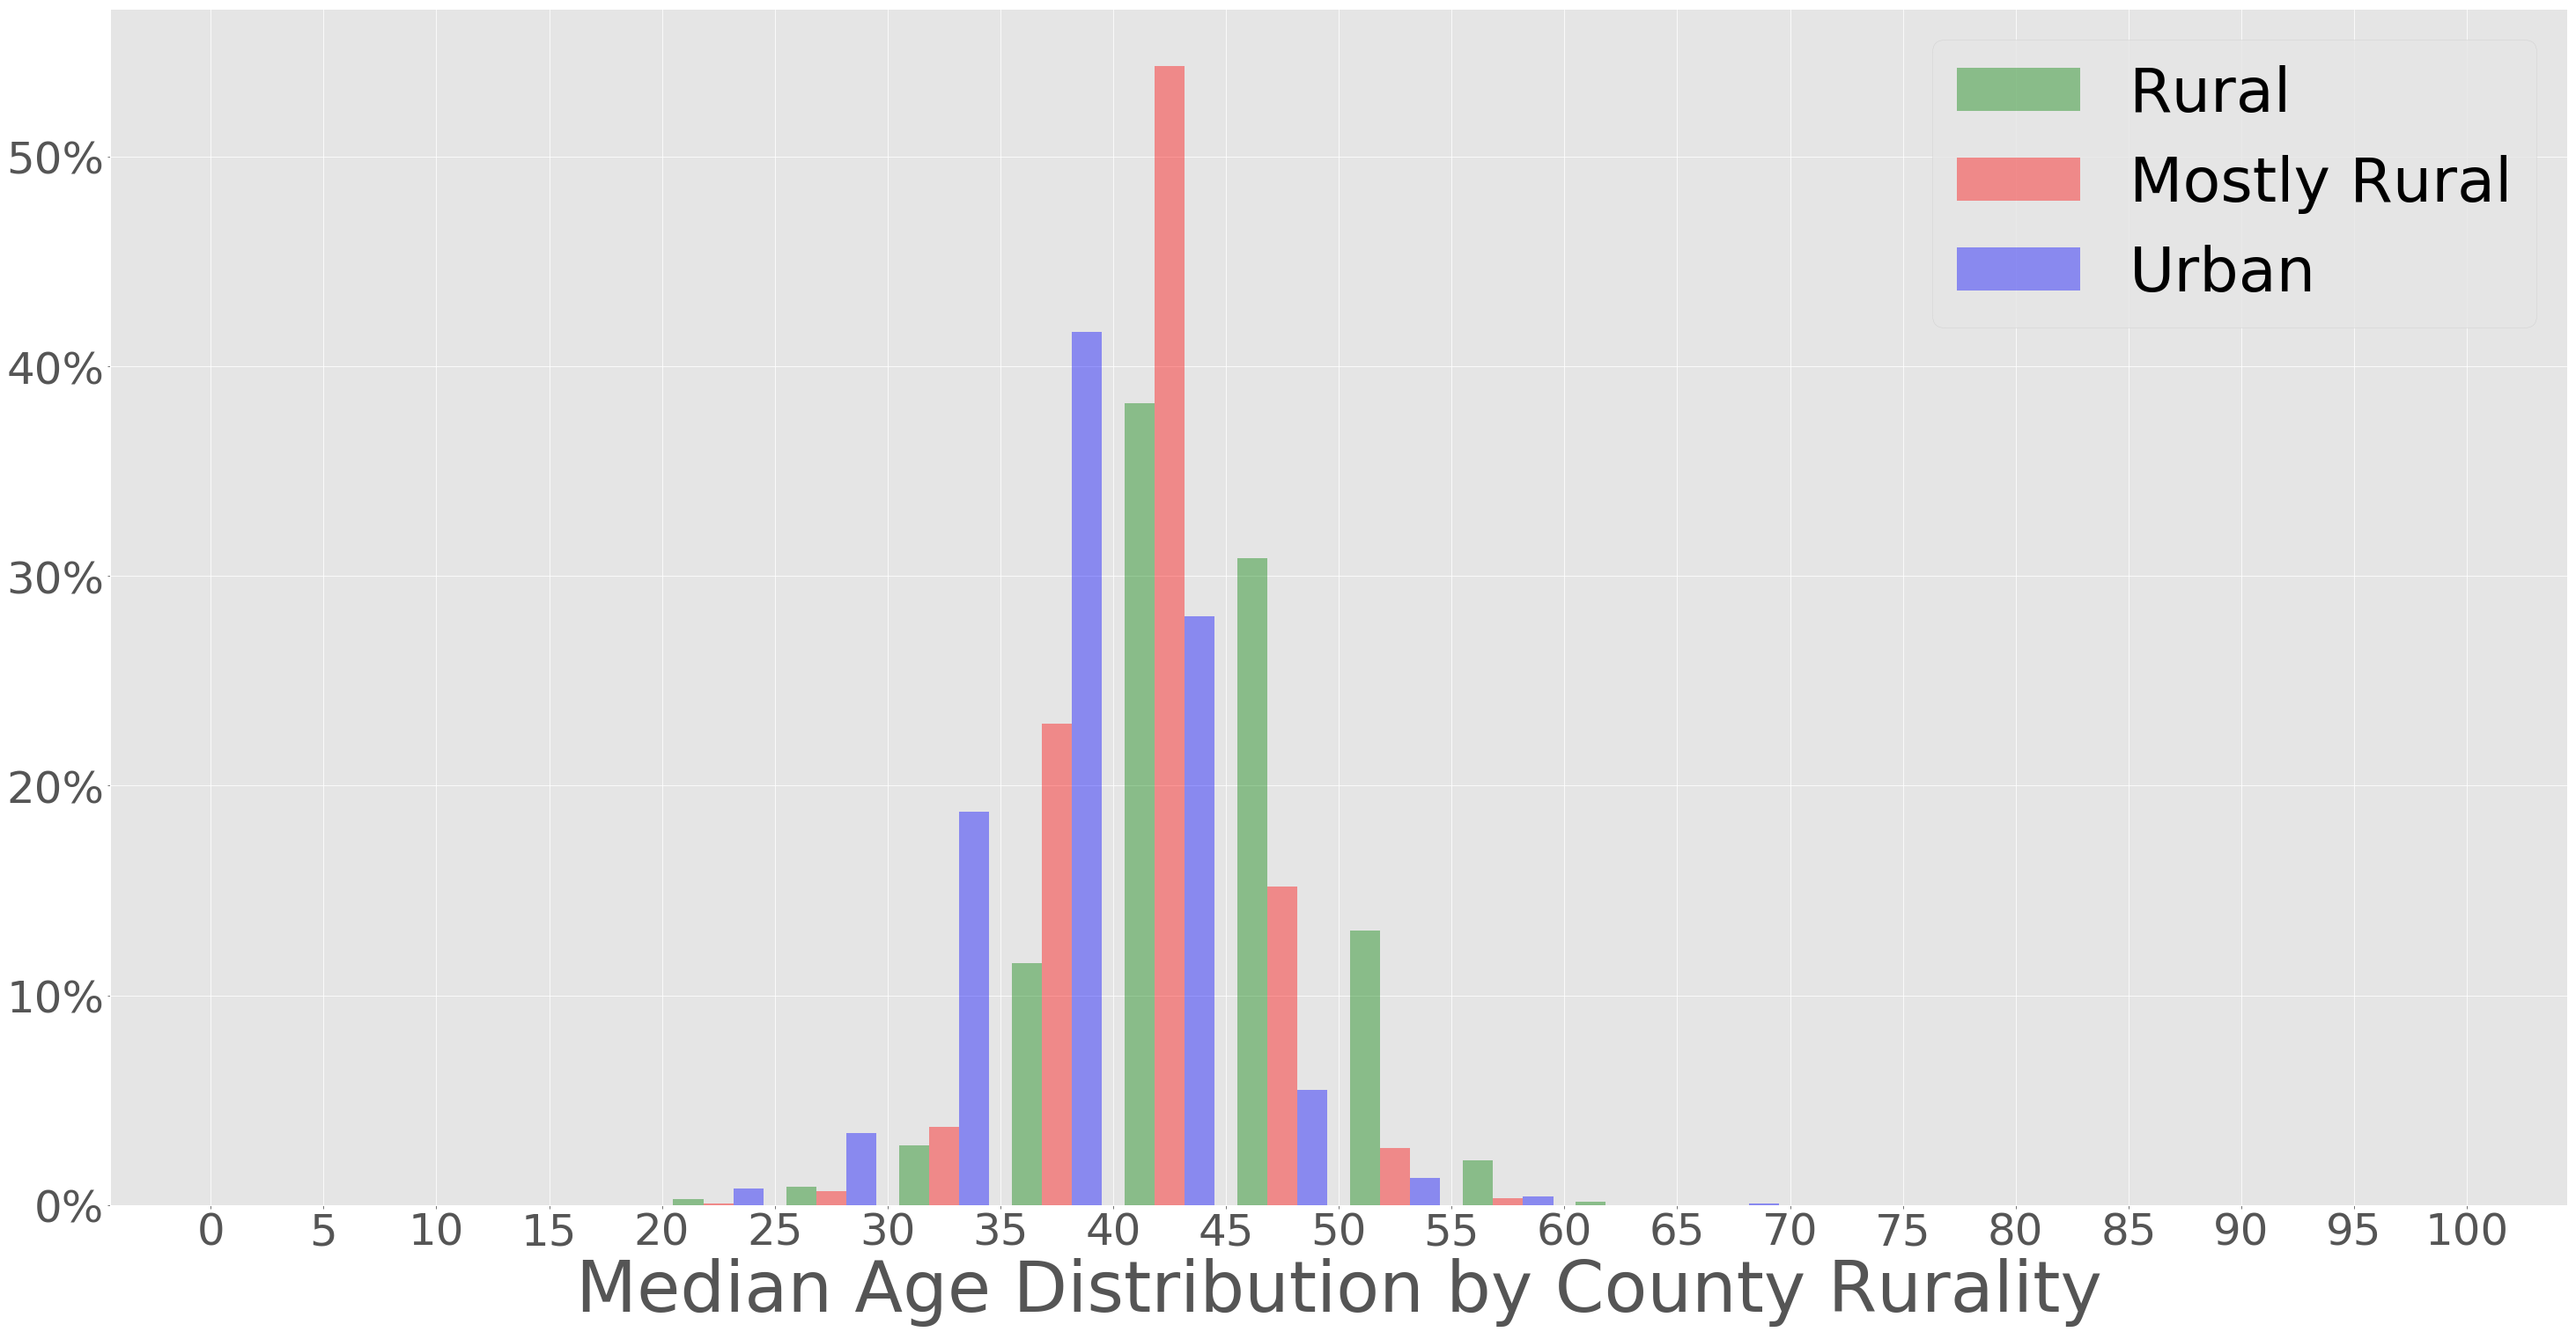

In [28]:
x = 'Median Age'
r_as = rural[x]
m_as = mrural[x]
u_as = urban[x]
fig, ax = plt.subplots(figsize=(50, 25) ,sharex = True )

mbin = [i *5 for i in range(0,21)]

plt.xticks( mbin,fontsize=30)
ax.yaxis.set_major_formatter(PercentFormatter())


plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
 # labels along the bottom edge are off
#sns.set(font_scale=3)
sns.distplot([r_as,m_as,u_as],hist=True,  kde= False, bins =mbin, ax=ax, color=['green',"red",'blue',] , label=['Rural','Mostly Rural',"Urban"], hist_kws={ "weights":[100 * np.ones_like(r_as)/float(len(r_as)),100 * np.ones_like(m_as)/float(len(m_as)),100 * np.ones_like(u_as)/float(len(u_as))]})
#sns.distplot(r_as,hist=True,  kde= False, bins =mbin, ax=ax, color='green', label="Rural",hist_kws={ "weights":100 * np.ones_like(r_as)/float(len(r_as)),"stacked":False})
#sns.distplot(m_as,hist=True, ax=ax,kde= False, color='r', bins= mbin,label="Mostly rural",hist_kws={"weights":100 * np.ones_like(m_as)/float(len(m_as)),"stacked":False})
#sns.distplot(u_as,hist=True,  ax=ax, kde= False, color='b', bins= mbin, label="Urban",hist_kws={"weights":100 * np.ones_like(u_as)/float(len(u_as)),"stacked":False})
ax.legend(loc=1, prop={'size': 70})

plt.xlabel('Median Age Distribution by County Rurality', fontsize=80)
plt.show()

In [29]:
rural['Median Household Income'].head()


12    32622
26    38815
40    36316
54    31910
68    37557
Name: Median Household Income, dtype: int64

c:\users\gabriel\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


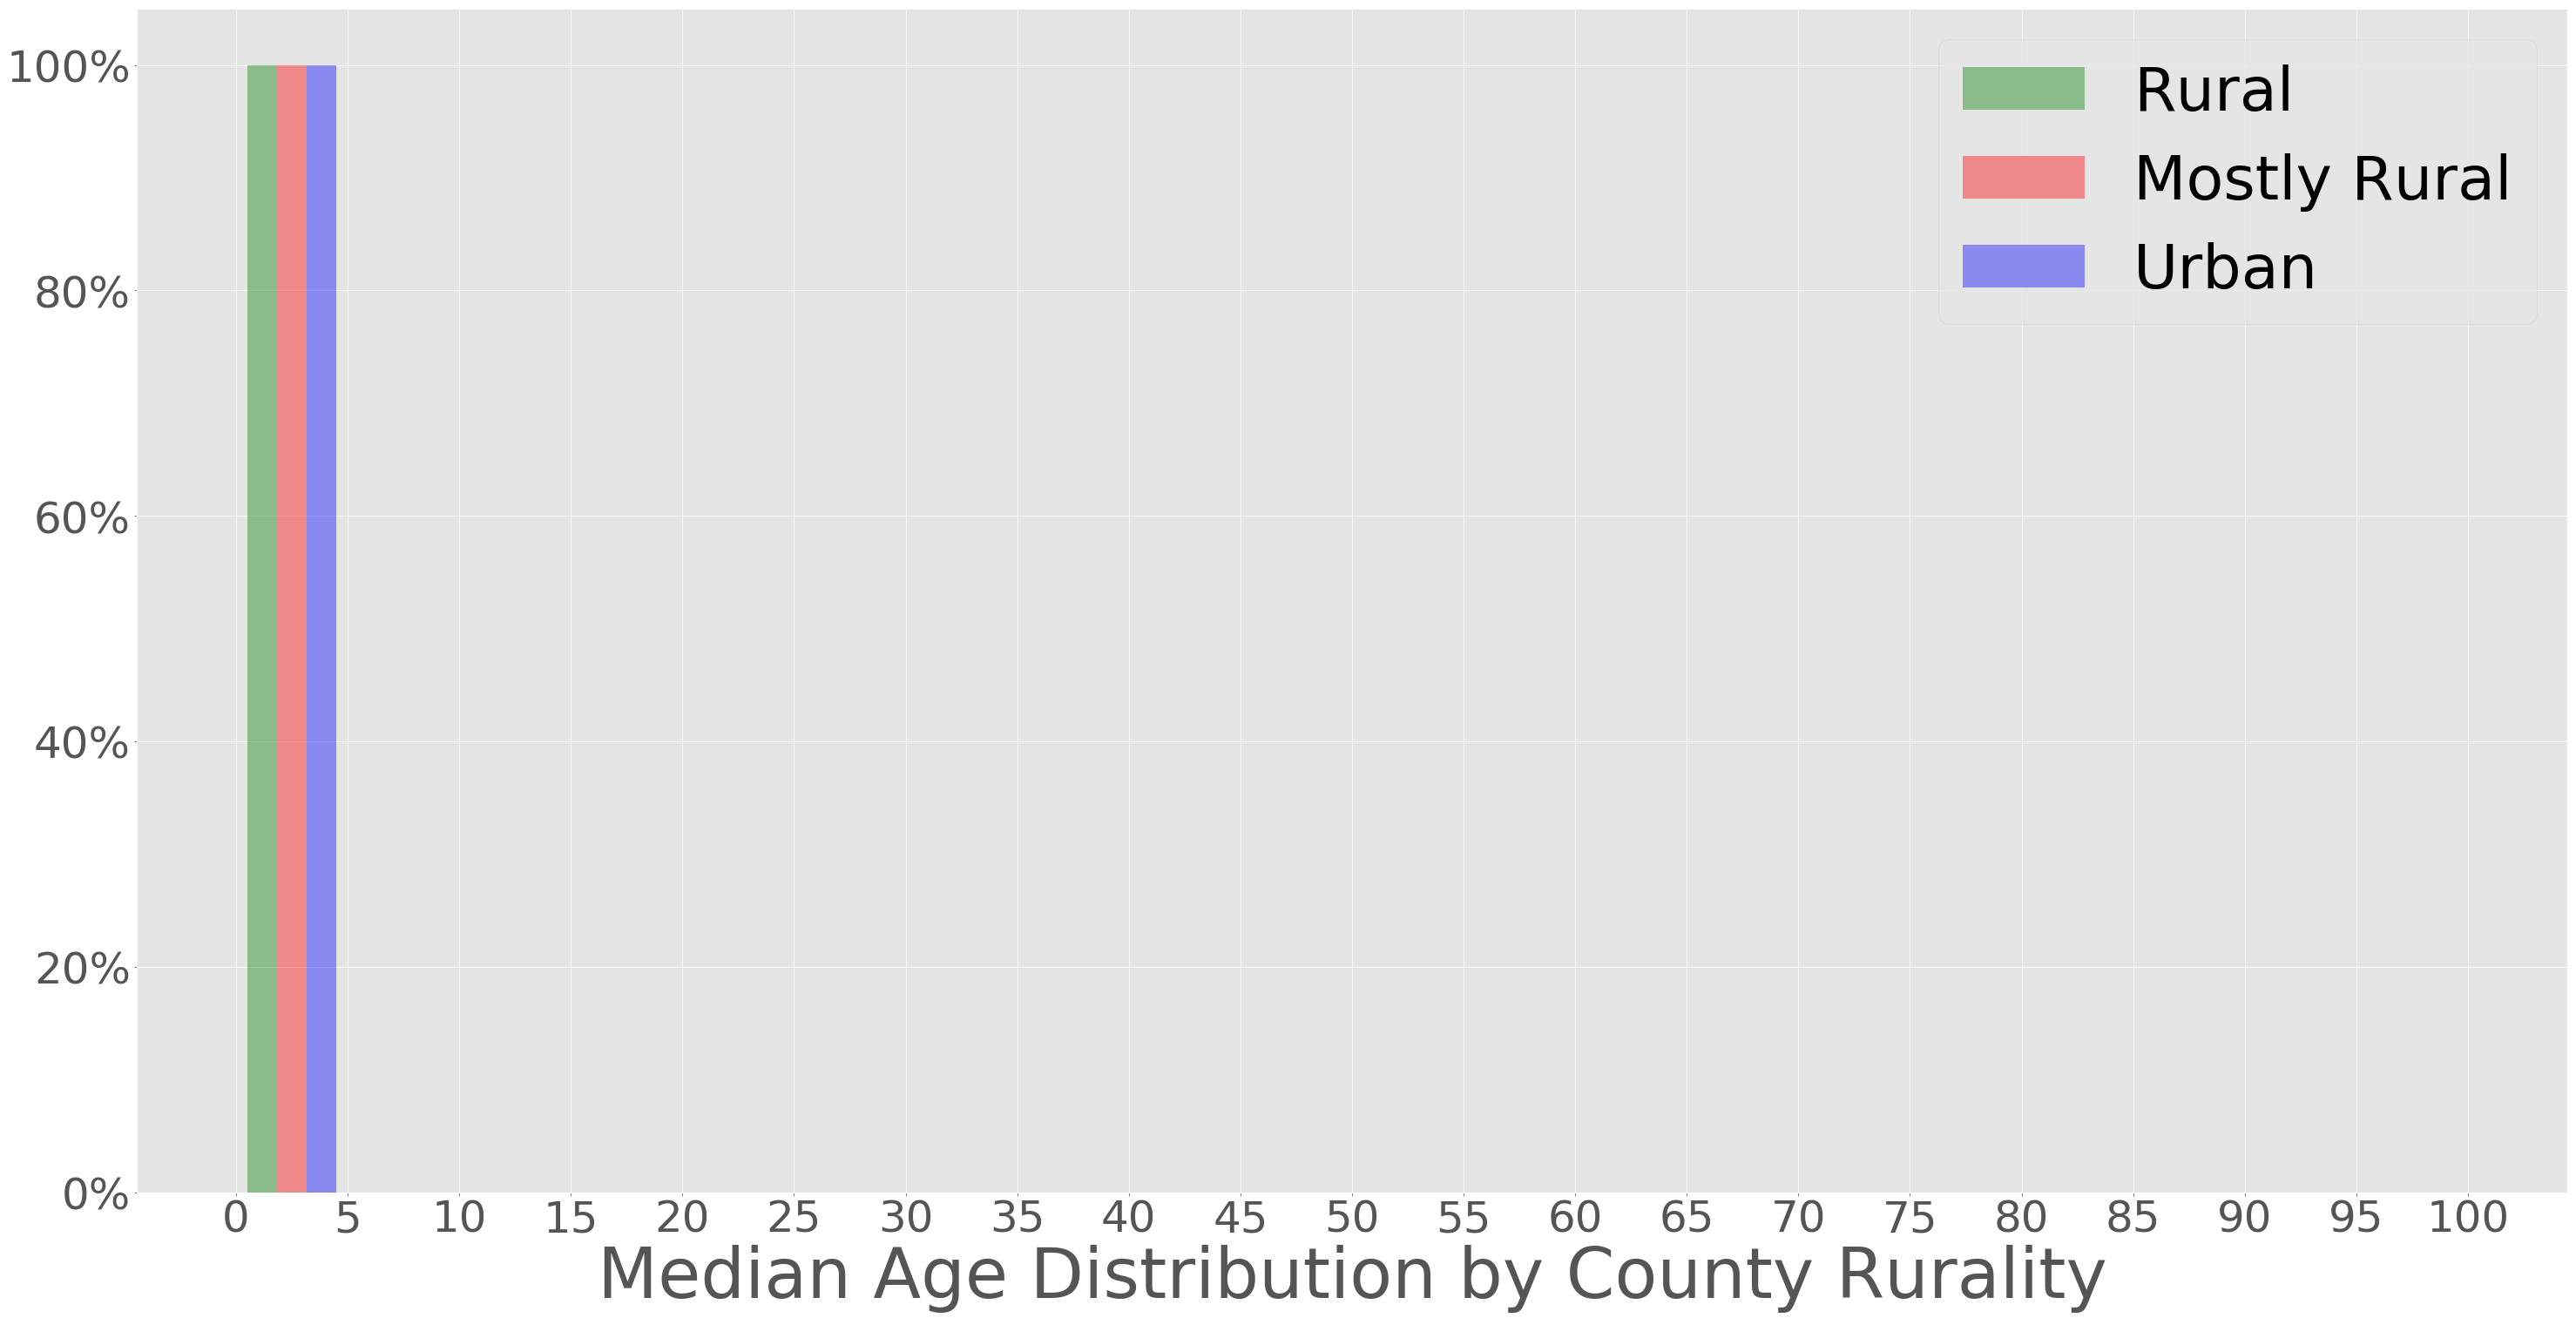

In [30]:
x = 'under_18'
r_as = rural[x]/rural['Population']
m_as = mrural[x]/mrural['Population']
u_as = urban[x]/urban['Population']
fig, ax = plt.subplots(figsize=(50, 25) ,sharex = True )

mbin = [i *5 for i in range(0,21)]

plt.xticks( mbin,fontsize=30)
ax.yaxis.set_major_formatter(PercentFormatter())


plt.xticks(fontsize = 50)
plt.yticks(fontsize = 50)
 # labels along the bottom edge are off
#sns.set(font_scale=3)
sns.distplot([r_as,m_as,u_as],hist=True,  kde= False, bins =mbin, ax=ax, color=['green',"red",'blue',] , label=['Rural','Mostly Rural',"Urban"], hist_kws={ "weights":[100 * np.ones_like(r_as)/float(len(r_as)),100 * np.ones_like(m_as)/float(len(m_as)),100 * np.ones_like(u_as)/float(len(u_as))]})
#sns.distplot(r_as,hist=True,  kde= False, bins =mbin, ax=ax, color='green', label="Rural",hist_kws={ "weights":100 * np.ones_like(r_as)/float(len(r_as)),"stacked":False})
#sns.distplot(m_as,hist=True, ax=ax,kde= False, color='r', bins= mbin,label="Mostly rural",hist_kws={"weights":100 * np.ones_like(m_as)/float(len(m_as)),"stacked":False})
#sns.distplot(u_as,hist=True,  ax=ax, kde= False, color='b', bins= mbin, label="Urban",hist_kws={"weights":100 * np.ones_like(u_as)/float(len(u_as)),"stacked":False})
ax.legend(loc=1, prop={'size': 70})

plt.xlabel('Median Age Distribution by County Rurality', fontsize=80)
plt.show()

In [31]:
rural.head()

,geo_id,Median Age,Median Age ME,Population,White,Black,Native American,Asian,Native Hawaiian,Other,...,LAUS Code,S_Code,Code,County Name/State Abbreviation,Period,Force,Employed,Unemployed,unemployment_rate,fbp
12,1023,45.1,0.1,13287,7468,5611,2,6,0,2,...,CN0102300000000,1,23,"Choctaw County, AL",Jun-18,4643,4321,322,6.9,0.165575
26,1027,43.7,0.5,13483,10822,1988,119,0,0,25,...,CN0102700000000,1,27,"Clay County, AL",Jun-18,6016,5731,285,4.7,1.891270
40,1029,41.5,0.7,14991,13911,354,21,86,0,0,...,CN0102900000000,1,29,"Cleburne County, AL",Jun-18,5858,5543,315,5.4,1.747715
54,1037,44.9,0.3,10864,7064,3516,8,0,0,0,...,CN0103700000000,1,37,"Coosa County, AL",Jun-18,4460,4228,232,5.2,1.251841
68,1041,41.6,0.7,13896,9848,3290,123,232,0,55,...,CN0104100000000,1,41,"Crenshaw County, AL",Jun-18,6446,6135,311,4.8,2.288428


In [32]:
brural = pd.read_excel("bea_final_rural.xlsx")
bmrural = pd.read_excel("beafinal_mrural.xlsx")
burban = pd.read_excel("beafinal_urban.xlsx")

In [33]:

burban.head()

,geo_id,Median Age,Median Age ME,Population,White,Black,Native American,Asian,Native Hawaiian,Other,...,S_Code,Code,County Name/State Abbreviation,Period,Force,Employed,Unemployed,unemployment_rate,income_p_capita,GeoName
0,1001,37.8,0.5,55049,41663,10113,226,444,6,123,...,1,1,"Autauga County, AL",Jun-18,26504,25309,1195,4.5,2201206,"Autauga, AL"
1,1003,42.3,0.3,199510,165950,18406,1228,1325,0,305,...,1,3,"Baldwin County, AL",Jun-18,98459,94288,4171,4.2,8610692,"Baldwin, AL"
2,1015,39.1,0.4,115883,84592,23561,229,1079,6,27,...,1,15,"Calhoun County, AL",Jun-18,47029,44279,2750,5.8,3942713,"Calhoun, AL"
3,1017,43.1,0.3,34018,19303,13770,78,312,0,17,...,1,17,"Chambers County, AL",Jun-18,15396,14646,750,4.9,1080439,"Chambers, AL"
4,1031,39.3,0.4,50991,36393,8671,421,623,0,5,...,1,31,"Coffee County, AL",Jun-18,20814,19754,1060,5.1,2045097,"Coffee, AL"


In [34]:

data = pybea.get_data(b_key,
                      DataSetName='RegionalIncome',
                      TableName='CA1',
                      LineCode=3,
                      GeoFips='COUNTY',
                      Year=[ '2016'],
                      ResultFormat='JSON')
data = pd.DataFrame(data)

#data =data.drop_duplicates()
data = data.rename(index =str, columns = {"GeoFips":"geo_id","DataValue":"p_income"})
data = data.drop(["CL_UNIT","Code","NoteRef","TimePeriod","UNIT_MULT"], axis = 1)


In [35]:
data.head()

,p_income,geo_id,GeoName
0,49246.0,00000,United States
1,38896.0,01000,Alabama
2,39721.0,01001,"Autauga, AL"
3,41286.0,01003,"Baldwin, AL"
4,31788.0,01005,"Barbour, AL"


In [36]:
rural_result = pd.merge(brural,data ,on='geo_id')

In [37]:
rural['geo_id'] = rural['geo_id'].astype(str)
rural['geo_id'] = rural['geo_id'].str.zfill(5)
mrural['geo_id'] = mrural['geo_id'].astype(str)
mrural['geo_id'] = mrural['geo_id'].str.zfill(5)
urban['geo_id'] = urban['geo_id'].astype(str)
urban['geo_id'] = urban['geo_id'].str.zfill(5)

In [38]:
rural_result = pd.merge(data,rural ,on='geo_id')
mrural_result = pd.merge(data,mrural ,on='geo_id')
urban_result = pd.merge(data,urban ,on='geo_id')

In [39]:
total = pd.concat([rural_result,mrural_result,urban_result])

In [40]:
x = pd.merge(total, data, on ="geo_id", how = "outer",indicator = True)


In [41]:
y = x[x['_merge'] == 'right_only']
y=y[y['p_income_y'] >0]

In [42]:



va =y[y['GeoName_y'].str.contains("VA")]

In [43]:
va.head()

,p_income_x,geo_id,GeoName_x,Median Age,Median Age ME,Population,White,Black,Native American,Asian,...,County Name/State Abbreviation,Period,Force,Employed,Unemployed,unemployment_rate,fbp,p_income_y,GeoName_y,_merge
3162,NaN,51901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60964.0,"Albemarle + Charlottesville, VA*",right_only
3163,NaN,51903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37436.0,"Alleghany + Covington, VA*",right_only
3164,NaN,51907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39856.0,"Augusta, Staunton + Waynesboro, VA*",right_only
3165,NaN,51911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35818.0,"Campbell + Lynchburg, VA*",right_only
3166,NaN,51913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33418.0,"Carroll + Galax, VA*",right_only


In [44]:
va = va.rename(index =str, columns = {'p_income_y':'p_income'})


In [45]:
va['p_income']

3162    60964.0
3163    37436.0
3164    39856.0
3165    35818.0
3166    33418.0
3167    38356.0
3168    75978.0
3169    46356.0
3170    31247.0
3171    35899.0
3172    59632.0
3173    33650.0
3174    35326.0
3175    37561.0
3176    51164.0
3177    48384.0
3178    37989.0
3179    36021.0
3180    35898.0
3181    47230.0
3182    39321.0
3183    29502.0
3184    54592.0
Name: p_income, dtype: float64

No handles with labels found to put in legend.
c:\users\gabriel\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


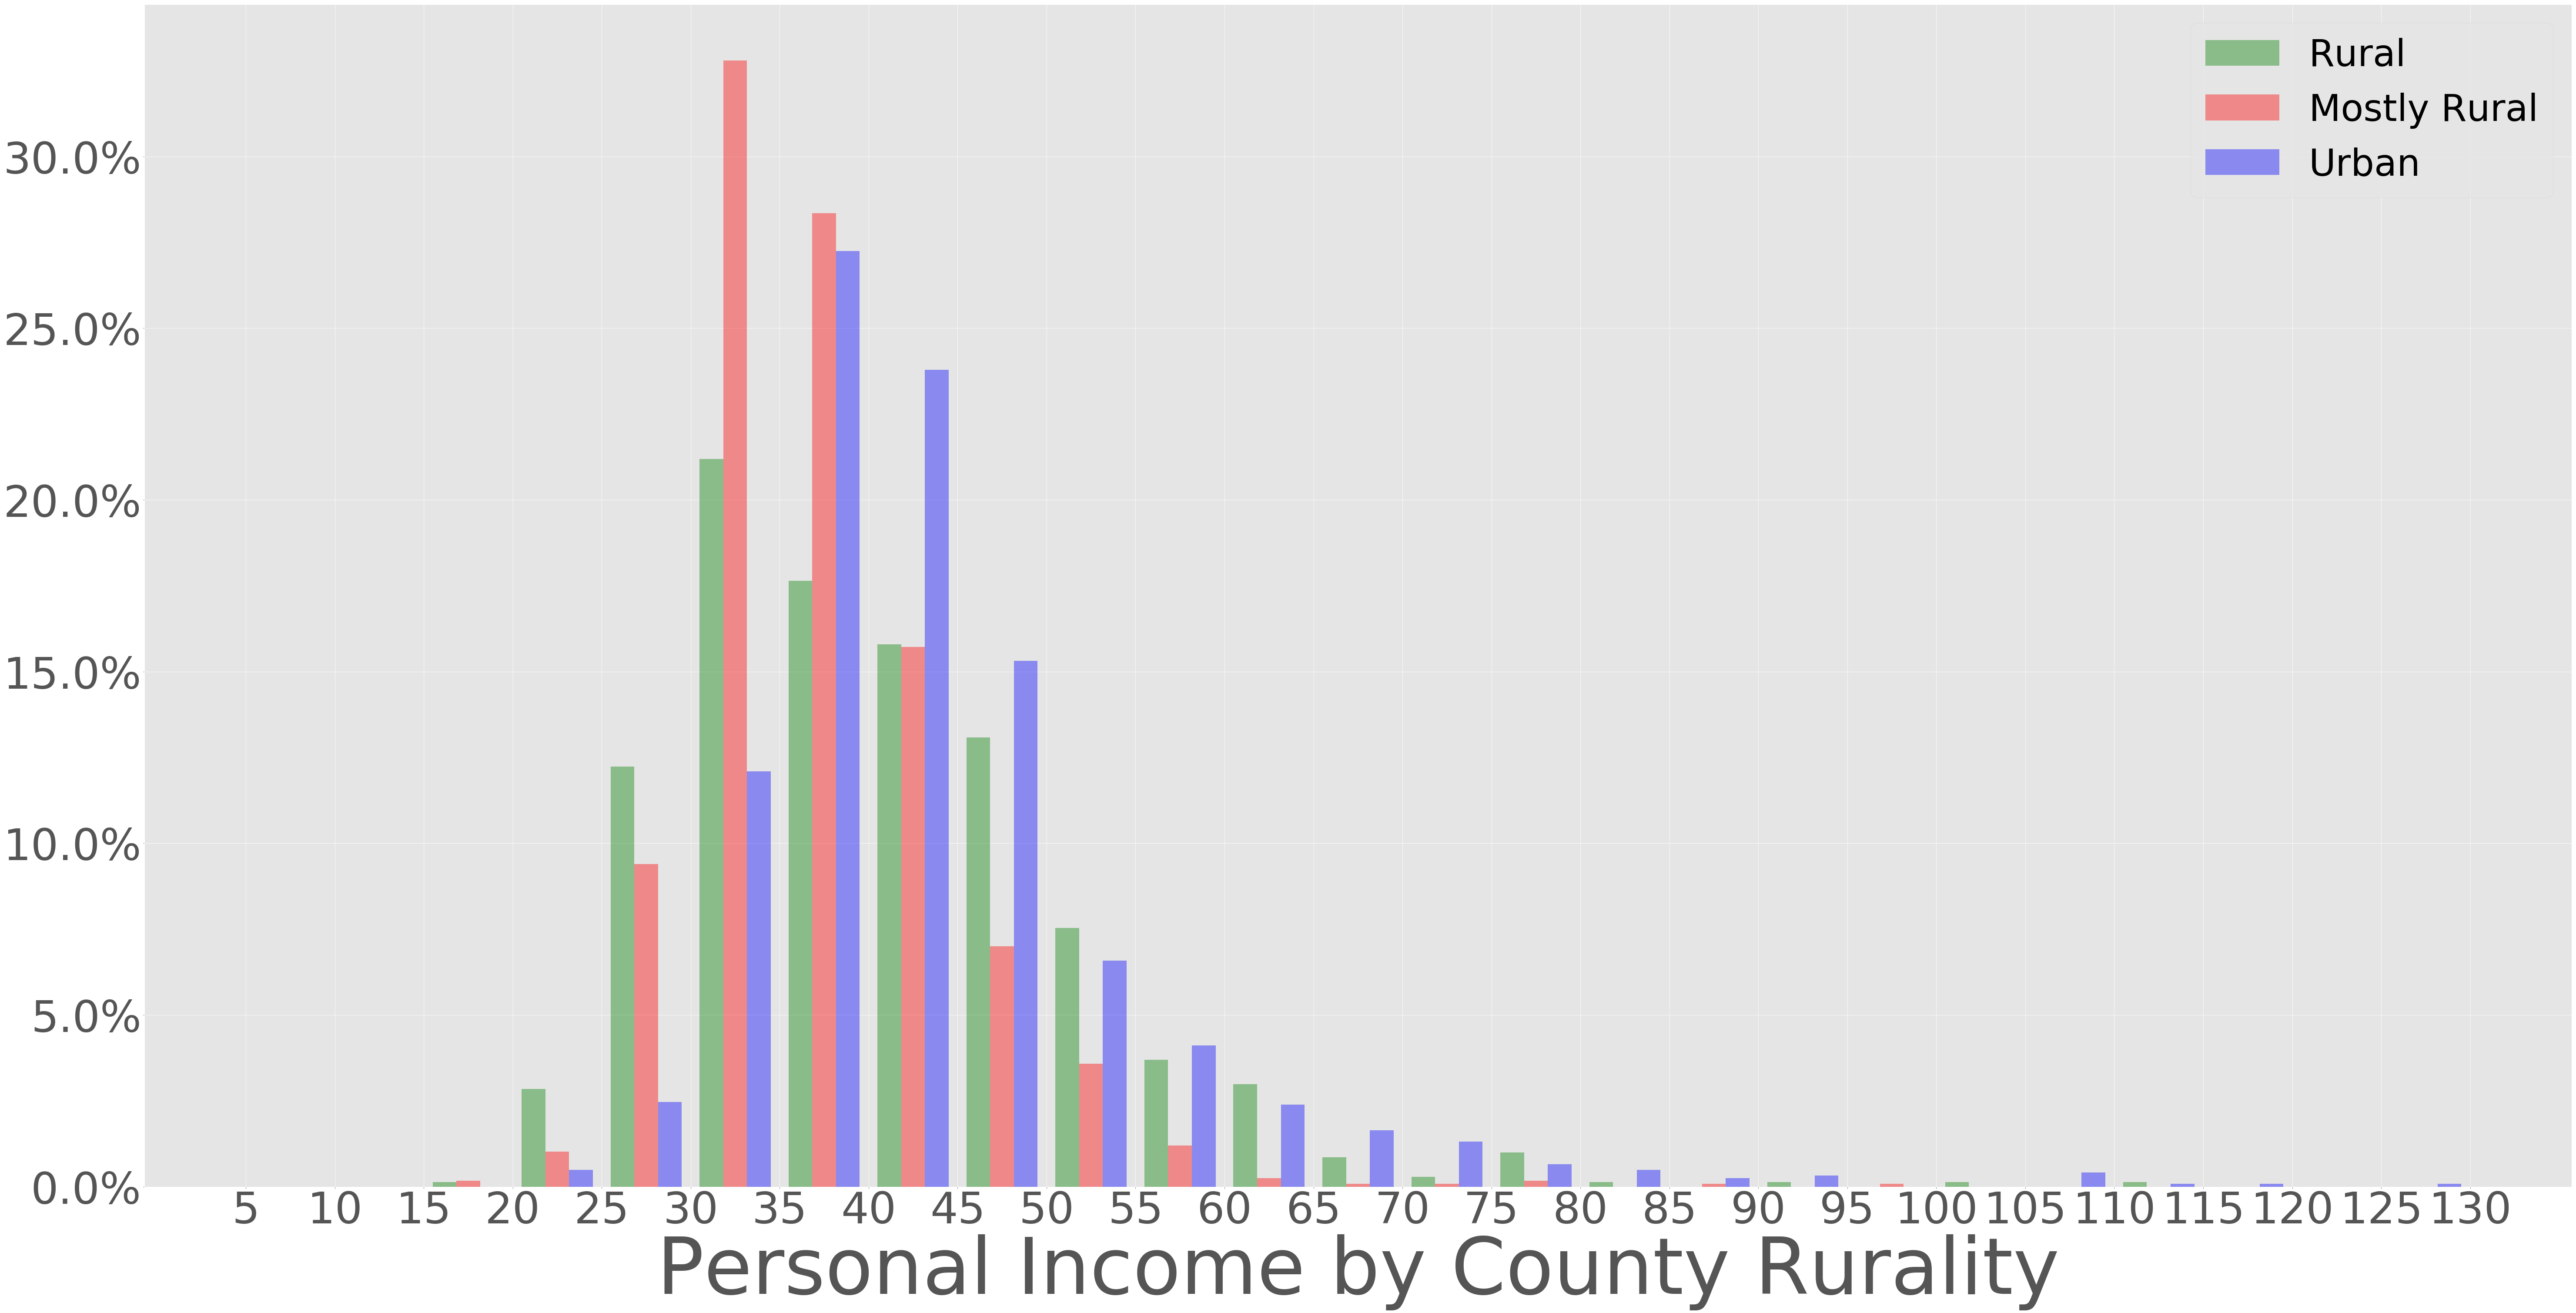

In [46]:
maui = 44478.0
x = "p_income"

r_as = rural_result[x]
m_as = mrural_result[x]
u_as = urban_result[x]
u_as.add(va[x])

mlabels = [str(i *5) for i in range(1,27)]

fig, ax = plt.subplots(figsize=(100, 50) ,sharex = True )
ax.legend(loc=1, prop={'size': 70})

ax.yaxis.set_major_formatter(PercentFormatter())



mbins = [i * 5000 for i in range(1,27)]
plt.xticks( mbins,fontsize=35)
plt.xticks(fontsize =100)
plt.yticks(fontsize = 100)
plt.xlabel('Personal Income by County Rurality', fontsize=180)
ax.set_xticklabels(mlabels)



sns.distplot([r_as,m_as,u_as],hist=True, kde= False, bins =mbins, ax=ax, color=['green',"red",'blue',] , label=['Rural','Mostly Rural',"Urban"], hist_kws={"weights":[100 * np.ones_like(r_as)/float(len(r_as)),100 * np.ones_like(m_as)/float(len(m_as)),100 * np.ones_like(u_as)/float(len(u_as))]})
 # labels along the bottom edge are off
#sns.set(font_scale=3)
#sns.distplot(r_as,hist=True,  kde= False, bins =mbin, ax=ax, color='green', label="Rural",hist_kws={ "weights":100 * np.ones_like(r_as)/float(len(r_as)),"stacked":False})
#sns.distplot(m_as,hist=True, ax=ax,kde= False, color='r', bins= mbin,label="Mostly rural",hist_kws={"weights":100 * np.ones_like(m_as)/float(len(m_as)),"stacked":False})
#sns.distplot(u_as,hist=True,  ax=ax, kde= False, color='b', bins= mbin, label="Urban",hist_kws={"weights":100 * np.ones_like(u_as)/float(len(u_as)),"stacked":False})
ax.legend(loc=1, prop={'size': 85})



plt.show()

In [53]:
sum(urban['Population'])

276467610